In [1]:
# ============================================
# ЯЧЕЙКА 1: БАЗОВАЯ НАСТРОЙКА ОКРУЖЕНИЯ И ПУТЕЙ
# ============================================

import os
import sys
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Отключаем предупреждения для чистоты вывода
warnings.filterwarnings('ignore')

# =========== КРИТИЧЕСКИ ВАЖНЫЕ НАСТРОЙКИ SUMO ===========
# 1. Указываем путь к установленному SUMO
SUMO_HOME_PATH = r"C:\Program Files (x86)\Eclipse\Sumo"
SUMO_BINARY = os.path.join(SUMO_HOME_PATH, 'bin', 'sumo.exe')

# 2. Устанавливаем переменные окружения
os.environ['SUMO_HOME'] = SUMO_HOME_PATH
os.environ['PATH'] = os.path.join(SUMO_HOME_PATH, 'bin') + os.pathsep + os.environ['PATH']

# 3. Добавляем модули SUMO (traci) в Python path
sys.path.append(os.path.join(SUMO_HOME_PATH, 'tools'))

# =========== НАСТРОЙКА ПУТЕЙ ПРОЕКТА ===========
# Определяем корневую директорию проекта (где лежит my_solution.ipynb)
project_root = Path.cwd()
smart_city_dir = project_root / "smart_city"
src_dir = smart_city_dir / "src"
data_dir = smart_city_dir / "data" / "sumo"
result_dir = smart_city_dir / "result"

# Добавляем папку src в Python path для импорта ваших модулей
sys.path.insert(0, str(src_dir))

# Создаем папку для результатов, если её нет
result_dir.mkdir(exist_ok=True)

# =========== ВЫВОД ИНФОРМАЦИИ ДЛЯ ПРОВЕРКИ ===========
print("="*70)
print("НАСТРОЙКА ПРОЕКТА 'АДАПТИВНОЕ УПРАВЛЕНИЕ СВЕТОФОРАМИ'")
print("="*70)
print(f"✅ SUMO_HOME установлен: {os.environ['SUMO_HOME']}")
print(f"✅ Бинарный файл SUMO: {SUMO_BINARY}")
print(f"   Файл существует: {os.path.exists(SUMO_BINARY)}")
print(f"\n✅ Пути проекта:")
print(f"   Корень: {project_root}")
print(f"   Исходный код (src): {src_dir}")
print(f"   Данные: {data_dir}")
print(f"   Результаты: {result_dir}")
print(f"\n✅ Python path (первые 3 элемента):")
for p in sys.path[:3]:
    print(f"   - {p}")
print("="*70)

НАСТРОЙКА ПРОЕКТА 'АДАПТИВНОЕ УПРАВЛЕНИЕ СВЕТОФОРАМИ'
✅ SUMO_HOME установлен: C:\Program Files (x86)\Eclipse\Sumo
✅ Бинарный файл SUMO: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo.exe
   Файл существует: True

✅ Пути проекта:
   Корень: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project
   Исходный код (src): C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\src
   Данные: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\data\sumo
   Результаты: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\result

✅ Python path (первые 3 элемента):
   - C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\src
   - C:\Program Files (x86)\Eclipse\Sumo\tools
   - C:\Users\ksuzh\AppData\Local\Programs\Python\Python311\python311.zip


In [2]:
# ============================================
# ЯЧЕЙКА 2: ПРОВЕРКА ИМПОРТА МОДУЛЕЙ
# ============================================

print("ПРОВЕРКА ИМПОРТА ВСЕХ НЕОБХОДИМЫХ МОДУЛЕЙ...")
print("-" * 50)

# Список модулей для проверки
modules_to_check = [
    ("traci", "Основной модуль SUMO API"),
    ("numpy", "Библиотека для научных вычислений"),
    ("pandas", "Библиотека для работы с данными"),
    ("matplotlib", "Библиотека для визуализации"),
]

# Проверяем стандартные модули
for module_name, description in modules_to_check:
    try:
        __import__(module_name)
        print(f"✅ {module_name:20} - {description}")
    except ImportError as e:
        print(f"❌ {module_name:20} - ОШИБКА: {e}")

print("-" * 50)
print("ПРОВЕРКА МОДУЛЕЙ ПРОЕКТА...")

# Проверяем модули проекта
project_modules = [
    ("controller", "Базовый контроллер светофора"),
    ("participant_controller", "Контроллер участника"),
    ("tripinfo_calculator", "Калькулятор метрик"),
]

for module_name, description in project_modules:
    try:
        __import__(module_name)
        print(f"✅ {module_name:20} - {description}")
    except ImportError as e:
        print(f"❌ {module_name:20} - ОШИБКА: {e}")
        print(f"   Путь поиска: {sys.path}")

print("-" * 50)

# Детальная проверка ключевых компонентов
print("\nДЕТАЛЬНАЯ ПРОВЕРКА КЛЮЧЕВЫХ КОМПОНЕНТОВ:")
try:
    import traci
    print("✅ traci: Успешный импорт")
    
    # Пробуем получить версию traci
    print(f"   Версия traci доступна")
    
    # Проверяем наши модули
    from controller import IntersectionController
    print("✅ IntersectionController: Доступен")
    
    import participant_controller
    print("✅ participant_controller: Доступен")
    
    from tripinfo_calculator import calculate_metrics
    print("✅ tripinfo_calculator.calculate_metrics: Доступна")
    
    print("\n✅ ВСЕ МОДУЛИ УСПЕШНО ИМПОРТИРОВАНЫ!")
    
except ImportError as e:
    print(f"\n❌ КРИТИЧЕСКАЯ ОШИБКА: {e}")
    print("\nВозможные решения:")
    print("1. Убедитесь, что все файлы находятся в папке smart_city/src/")
    print("2. Проверьте правильность имен файлов:")
    print("   - controller.py")
    print("   - participant_controller.py")
    print("   - tripinfo_calculator.py")
    print("3. Убедитесь, что в controller.py нет синтаксических ошибок")
    
except Exception as e:
    print(f"\n⚠️ ПРЕДУПРЕЖДЕНИЕ: {e}")

ПРОВЕРКА ИМПОРТА ВСЕХ НЕОБХОДИМЫХ МОДУЛЕЙ...
--------------------------------------------------
✅ traci                - Основной модуль SUMO API
✅ numpy                - Библиотека для научных вычислений
✅ pandas               - Библиотека для работы с данными
✅ matplotlib           - Библиотека для визуализации
--------------------------------------------------
ПРОВЕРКА МОДУЛЕЙ ПРОЕКТА...
✅ controller           - Базовый контроллер светофора
✅ participant_controller - Контроллер участника
✅ tripinfo_calculator  - Калькулятор метрик
--------------------------------------------------

ДЕТАЛЬНАЯ ПРОВЕРКА КЛЮЧЕВЫХ КОМПОНЕНТОВ:
✅ traci: Успешный импорт
   Версия traci доступна
✅ IntersectionController: Доступен
✅ participant_controller: Доступен
✅ tripinfo_calculator.calculate_metrics: Доступна

✅ ВСЕ МОДУЛИ УСПЕШНО ИМПОРТИРОВАНЫ!


In [3]:
# ============================================
# ЯЧЕЙКА 3: ПРОВЕРКА КОНФИГУРАЦИОННЫХ ФАЙЛОВ
# ============================================

import xml.etree.ElementTree as ET
from pathlib import Path

print("="*70)
print("ПРОВЕРКА КОНФИГУРАЦИОННЫХ ФАЙЛОВ SUMO")
print("="*70)

# Проверяем основные файлы
print("\n🔍 ПРОВЕРКА СУЩЕСТВОВАНИЯ ФАЙЛОВ:")

# Основной конфигурационный файл
sumo_cfg_path = data_dir / "osm.net_cut.sumocfg"
print(f"1. Основной конфиг (sumocfg):")
print(f"   Путь: {sumo_cfg_path}")
print(f"   Существует: {sumo_cfg_path.exists()}")

if sumo_cfg_path.exists():
    # Читаем и анализируем конфиг
    try:
        tree = ET.parse(sumo_cfg_path)
        root = tree.getroot()
        
        print(f"   Формат: корректный XML")
        
        # Проверяем секцию input
        input_section = root.find('input')
        if input_section is not None:
            print(f"   Секция <input> найдена")
            
            # Проверяем net-file
            net_file_elem = input_section.find('net-file')
            if net_file_elem is not None:
                net_file_name = net_file_elem.get('value')
                net_file_path = data_dir / net_file_name
                print(f"   - net-file: {net_file_name}")
                print(f"     Существует: {net_file_path.exists()}")
            
            # Проверяем route-files
            route_file_elem = input_section.find('route-files')
            if route_file_elem is not None:
                route_file_name = route_file_elem.get('value')
                route_file_path = data_dir / route_file_name
                print(f"   - route-files: {route_file_name}")
                print(f"     Существует: {route_file_path.exists()}")
        
        # Проверяем секцию time
        time_section = root.find('time')
        if time_section is not None:
            begin = time_section.find('begin')
            end = time_section.find('end')
            if begin is not None and end is not None:
                print(f"   - Время симуляции: {begin.get('value')} - {end.get('value')} сек")
                
    except ET.ParseError as e:
        print(f"   ❌ Ошибка парсинга XML: {e}")
    except Exception as e:
        print(f"   ⚠️ Ошибка анализа: {e}")

# Проверяем другие файлы в папке data/sumo
print(f"\n2. Все файлы в {data_dir}:")
file_count = 0
for file_path in data_dir.iterdir():
    if file_path.is_file():
        file_size = file_path.stat().st_size
        file_size_str = f"{file_size:,} байт"
        if file_size > 1024*1024:  # больше 1 МБ
            file_size_str = f"{file_size/(1024*1024):.1f} МБ"
        elif file_size > 1024:  # больше 1 КБ
            file_size_str = f"{file_size/1024:.1f} КБ"
        
        print(f"   - {file_path.name:30} ({file_size_str})")
        file_count += 1

print(f"\n📊 ИТОГО: {file_count} файлов в директории данных")

# Проверяем сетевые файлы
print(f"\n3. Сетевые файлы (.net, .xml):")
net_files = list(data_dir.glob("*.net*")) + list(data_dir.glob("*.xml*"))
if net_files:
    for net_file in net_files[:5]:  # Показываем первые 5
        size_mb = net_file.stat().st_size / (1024*1024)
        print(f"   - {net_file.name:30} ({size_mb:.1f} МБ)")
    if len(net_files) > 5:
        print(f"   ... и еще {len(net_files) - 5} файлов")
else:
    print("   ❌ Сетевые файлы не найдены!")

print("\n" + "="*70)

ПРОВЕРКА КОНФИГУРАЦИОННЫХ ФАЙЛОВ SUMO

🔍 ПРОВЕРКА СУЩЕСТВОВАНИЯ ФАЙЛОВ:
1. Основной конфиг (sumocfg):
   Путь: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg
   Существует: True
   Формат: корректный XML
   Секция <input> найдена
   - net-file: osm.net_cut.xml.gz.net
     Существует: True
   - route-files: osm.passenger.trips
     Существует: True

2. Все файлы в C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\data\sumo:
   - .DS_Store                      (6.0 КБ)
   - osm.net_cut.netecfg            (1.1 КБ)
   - osm.net_cut.sumocfg            (1.4 КБ)
   - osm.net_cut.xml.gz.net         (331.0 КБ)
   - osm.passenger.trips            (29.4 КБ)

📊 ИТОГО: 5 файлов в директории данных

3. Сетевые файлы (.net, .xml):
   - osm.net_cut.netecfg            (0.0 МБ)
   - osm.net_cut.sumocfg            (0.0 МБ)
   - osm.net_cut.xml.gz.net         (0.3 МБ)
   - osm.net_cut.xml.gz.net         (0.3 МБ)



In [4]:
# ============================================
# ЯЧЕЙКА 3а: ОЧИСТКА ПРЕДЫДУЩИХ СОЕДИНЕНИЙ SUMO
# ============================================

import traci

print("="*60)
print("ОЧИСТКА ПРЕДЫДУЩИХ СОЕДИНЕНИЙ SUMO")
print("="*60)

try:
    # Пробуем закрыть все активные соединения
    traci.close()
    print("✅ Существующие соединения SUMO закрыты")
except:
    print("ℹ️ Активных соединений не обнаружено")

# Дополнительная проверка и очистка
try:
    import subprocess
    import os
    
    # Закрываем возможные процессы sumo.exe
    if os.name == 'nt':  # Windows
        subprocess.run(["taskkill", "/F", "/IM", "sumo.exe"], 
                      capture_output=True, shell=True)
        subprocess.run(["taskkill", "/F", "/IM", "sumo-gui.exe"], 
                      capture_output=True, shell=True)
        print("✅ Процессы SUMO завершены (если были)")
except:
    print("ℹ️ Не удалось завершить процессы SUMO (может не потребоваться)")

print("\n✅ Система готова к новому запуску симуляции")
print("="*60)

ОЧИСТКА ПРЕДЫДУЩИХ СОЕДИНЕНИЙ SUMO
ℹ️ Активных соединений не обнаружено
✅ Процессы SUMO завершены (если были)

✅ Система готова к новому запуску симуляции


ТЕСТОВЫЙ ЗАПУСК SUMO (с очисткой соединений)

1. ОЧИСТКА ПРЕДЫДУЩИХ СОЕДИНЕНИЙ:
   ℹ️ Нет активных соединений для закрытия

2. ПРОВЕРКА КОМАНДНОЙ СТРОКИ SUMO:
   ✅ SUMO найден и работает

3. ЗАПУСК СИМУЛЯЦИИ:
   Конфиг: osm.net_cut.sumocfg
   Выходной файл: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\result\tripinfo_test.xml
   Команда: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo.exe -c C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg ...

4. ПОДГОТОВКА К ЗАПУСКУ...
   Запускаем SUMO...
   ✅ SUMO запущен успешно!
   Время запуска: 0.72 сек

5. ВЫПОЛНЕНИЕ 50 ШАГОВ СИМУЛЯЦИИ:
   Шаг  10/50:  39 ТС
   Шаг  20/50:  69 ТС
   Шаг  30/50: 102 ТС
   Шаг  40/50: 138 ТС
   Шаг  50/50: 169 ТС

   ✅ Симуляция завершена корректно!
   Общее время: 1.00 сек

6. РЕЗУЛЬТАТЫ:
   ✅ Файл результатов создан
   Размер: 1,555 байт

   📊 СТАТИСТИКА ПО ТРАНСПОРТНЫМ СРЕДСТВАМ:
   Максимум ТС за шаг: 169
   Минимум ТС за шаг: 12
   Среднее ТС за

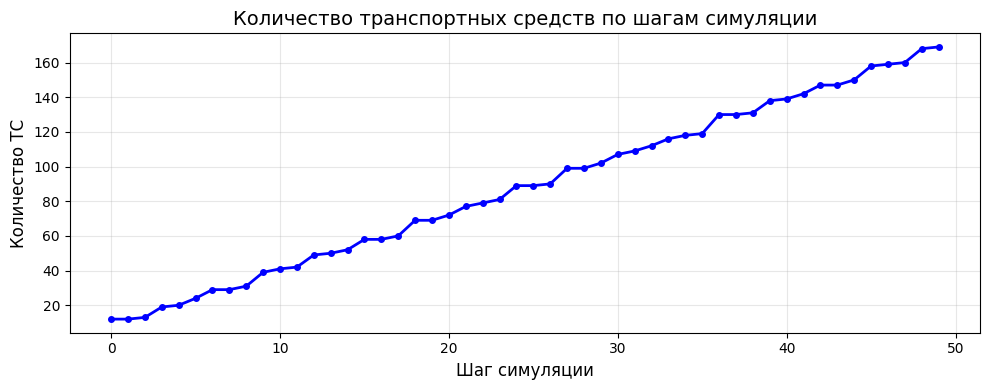


7. ФИНАЛЬНАЯ ОЧИСТКА:
   ℹ️ Соединение уже закрыто



In [5]:
# ============================================
# ЯЧЕЙКА 4: ТЕСТОВЫЙ ЗАПУСК SUMO (исправленная версия)
# ============================================

import traci
import time
import subprocess
import sys

print("="*70)
print("ТЕСТОВЫЙ ЗАПУСК SUMO (с очисткой соединений)")
print("="*70)

# ВАЖНО: Закрываем ВСЕ возможные предыдущие соединения
print("\n1. ОЧИСТКА ПРЕДЫДУЩИХ СОЕДИНЕНИЙ:")
try:
    # Пробуем импортировать и закрыть traci
    traci.close()
    print("   ✅ Существующие соединения закрыты")
except:
    print("   ℹ️ Нет активных соединений для закрытия")

# Проверяем работу sumo через командную строку
print("\n2. ПРОВЕРКА КОМАНДНОЙ СТРОКИ SUMO:")
version_cmd = [SUMO_BINARY, "--version"]
try:
    result = subprocess.run(
        version_cmd,
        capture_output=True,
        text=True,
        encoding='utf-8',
        errors='ignore',
        timeout=5
    )
    if "SUMO" in result.stdout or "SUMO" in result.stderr:
        print("   ✅ SUMO найден и работает")
        # Выводим первую строку с версией
        version_lines = (result.stdout + result.stderr).split('\n')
        for line in version_lines:
            if "SUMO" in line and "Version" in line:
                print(f"   Версия: {line.strip()}")
                break
    else:
        print("   ❌ SUMO не найден в PATH")
except Exception as e:
    print(f"   ❌ Ошибка запуска SUMO: {e}")

# Подготовка пути для результатов теста
tripinfo_test_path = result_dir / "tripinfo_test.xml"

# Создаем команду для запуска SUMO
cmd = [
    SUMO_BINARY,
    "-c", str(sumo_cfg_path),
    "--tripinfo-output", str(tripinfo_test_path),
    "--no-warnings", "true",
    "--duration-log.disable", "true",
    "--no-step-log", "true",
    "--time-to-teleport", "300"  # Автоматическая телепортация через 300 сек
]

print(f"\n3. ЗАПУСК СИМУЛЯЦИИ:")
print(f"   Конфиг: {sumo_cfg_path.name}")
print(f"   Выходной файл: {tripinfo_test_path}")
print(f"   Команда: {' '.join(cmd[:3])} ...")

# Удаляем старый файл, если он существует
if tripinfo_test_path.exists():
    tripinfo_test_path.unlink()
    print("   Старый файл tripinfo удален")

try:
    # ВАЖНО: Дополнительная очистка перед запуском
    print(f"\n4. ПОДГОТОВКА К ЗАПУСКУ...")
    
    # Проверяем, что нет активных соединений
    try:
        traci.close()
    except:
        pass
    
    # Запускаем SUMO через traci с таймаутом на подключение
    print(f"   Запускаем SUMO...")
    start_time = time.time()
    
    # Используем try-except для обработки возможных ошибок подключения
    try:
        # Вариант 1: Обычный запуск
        traci.start(cmd, label="simulation1")
        
    except traci.exceptions.TraCIException as e:
        if "already active" in str(e):
            print(f"   ⚠️ Обнаружено активное соединение, пытаемся очистить...")
            # Закрываем все соединения и пробуем снова
            try:
                traci.switch("simulation1")
                traci.close()
            except:
                pass
            
            # Ждем немного
            time.sleep(1)
            
            # Пробуем снова с новым лейблом
            traci.start(cmd, label="simulation2")
        else:
            raise
    
    print(f"   ✅ SUMO запущен успешно!")
    print(f"   Время запуска: {time.time() - start_time:.2f} сек")
    
    # Выполняем несколько шагов симуляции
    steps = 50
    print(f"\n5. ВЫПОЛНЕНИЕ {steps} ШАГОВ СИМУЛЯЦИИ:")
    
    vehicle_counts = []
    
    for step in range(steps):
        traci.simulationStep()
        
        # Собираем статистику
        vehicles = traci.vehicle.getIDCount()
        vehicle_counts.append(vehicles)
        
        # Выводим прогресс каждые 10 шагов
        if (step + 1) % 10 == 0:
            print(f"   Шаг {step + 1:3}/{steps}: {vehicles:3} ТС")
    
    # Завершаем симуляцию
    try:
        traci.close()
        print(f"\n   ✅ Симуляция завершена корректно!")
    except:
        print(f"\n   ⚠️ Соединение уже закрыто")
    
    elapsed = time.time() - start_time
    print(f"   Общее время: {elapsed:.2f} сек")
    
    # Проверяем результат
    print(f"\n6. РЕЗУЛЬТАТЫ:")
    if tripinfo_test_path.exists():
        size = tripinfo_test_path.stat().st_size
        print(f"   ✅ Файл результатов создан")
        print(f"   Размер: {size:,} байт")
        
        if size > 100:  # Проверяем, что файл не пустой
            # Показываем статистику по ТС
            print(f"\n   📊 СТАТИСТИКА ПО ТРАНСПОРТНЫМ СРЕДСТВАМ:")
            print(f"   Максимум ТС за шаг: {max(vehicle_counts) if vehicle_counts else 0}")
            print(f"   Минимум ТС за шаг: {min(vehicle_counts) if vehicle_counts else 0}")
            print(f"   Среднее ТС за шаг: {np.mean(vehicle_counts) if vehicle_counts else 0:.1f}")
            
            # Простой график
            if vehicle_counts:
                plt.figure(figsize=(10, 4))
                plt.plot(vehicle_counts, 'b-', linewidth=2, marker='o', markersize=4)
                plt.title('Количество транспортных средств по шагам симуляции', fontsize=14)
                plt.xlabel('Шаг симуляции', fontsize=12)
                plt.ylabel('Количество ТС', fontsize=12)
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
        else:
            print(f"   ⚠️ Файл результатов слишком мал ({size} байт). Возможно, симуляция не работала корректно.")
        
    else:
        print(f"   ❌ Файл результатов НЕ создан")
        
except traci.exceptions.FatalTraCIError as e:
    print(f"\n❌ FATAL ERROR: {e}")
    print("\nВозможные причины:")
    print("1. Ошибка в конфигурационном файле")
    print("2. Отсутствуют необходимые файлы (сеть, маршруты)")
    print("3. SUMO завершил работу с ошибкой")
    
    # Пробуем запустить SUMO напрямую для диагностики
    print(f"\n🔍 ДИАГНОСТИКА: Запуск SUMO напрямую...")
    try:
        result = subprocess.run(
            cmd,
            capture_output=True,
            text=True,
            encoding='utf-8',
            errors='ignore',
            timeout=5
        )
        print(f"Код возврата: {result.returncode}")
        if result.stdout and len(result.stdout) > 0:
            print(f"STDOUT (первые 300 символов):\n{result.stdout[:300]}")
        if result.stderr and len(result.stderr) > 0:
            print(f"STDERR (первые 300 символов):\n{result.stderr[:300]}")
    except Exception as diag_e:
        print(f"Ошибка диагностики: {diag_e}")
        
except FileNotFoundError as e:
    print(f"\n❌ ФАЙЛ НЕ НАЙДЕН: {e}")
    print(f"Проверьте путь: {SUMO_BINARY}")
    print(f"Файл существует: {os.path.exists(SUMO_BINARY)}")
    
except Exception as e:
    print(f"\n❌ ОШИБКА: {e}")
    import traceback
    traceback.print_exc()

# ВАЖНО: Гарантируем закрытие соединения в конце
print(f"\n7. ФИНАЛЬНАЯ ОЧИСТКА:")
try:
    traci.close()
    print("   ✅ Соединение закрыто")
except:
    print("   ℹ️ Соединение уже закрыто")

print("\n" + "="*70)

ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ С SUMO-GUI И КОНТРОЛЛЕРОМ

📋 ИНСТРУКЦИЯ ПО ЗАПУСКУ:

1. Быстрая симуляция (для теста):
   run_full_simulation_with_gui(steps=200, gui_delay=100)

2. Полная симуляция с медленной визуализацией:
   run_full_simulation_with_gui(steps=500, gui_delay=200)

3. Симуляция без контроллера (только наблюдение):
   run_full_simulation_with_gui(steps=300, use_controller=False)

🎮 УПРАВЛЕНИЕ В ОКНЕ SUMO-GUI:
   • Пауза: кнопка ▶️/⏸️ или Ctrl+P
   • Ускорение: кнопка >> или клавиши +
   • Замедление: кнопка << или клавиши -
   • Скриншот: кнопка 📷 или Ctrl+S
   • Закрыть: Alt+F4 или кнопка ✕


🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ:
   Шагов: 200
   Задержка GUI: 100 мс
   Контроллер: ВКЛЮЧЕН

📋 ПАРАМЕТРЫ ЗАПУСКА:
   Конфиг: osm.net_cut.sumocfg
   Результаты: tripinfo_full_1765724821.xml
   Команда: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui.exe -c C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg --tripinfo-output ...

🎮 ЗАПУСК SUMO-GUI..

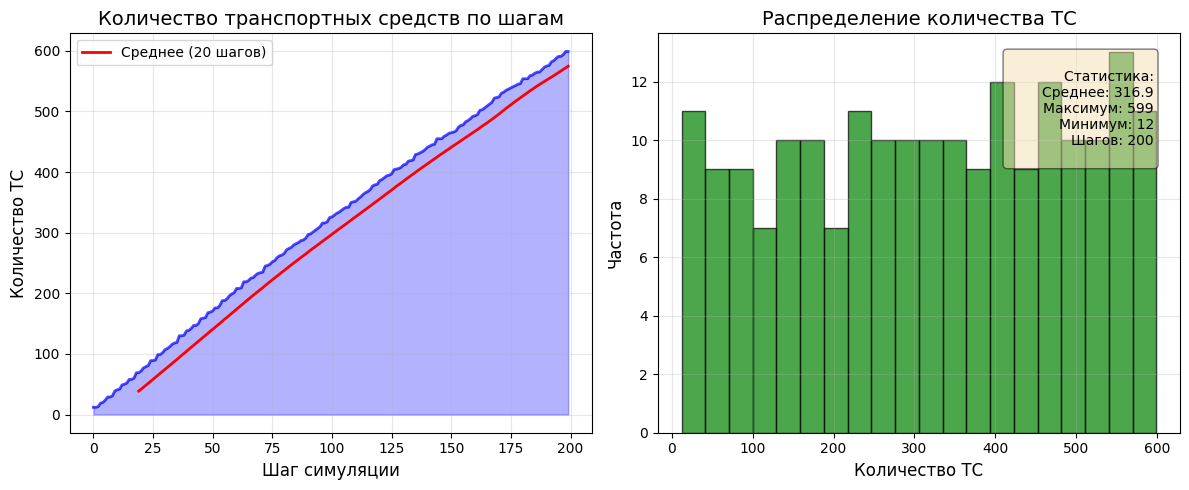


🎉 ПОЛНАЯ СИМУЛЯЦИЯ ЗАВЕРШЕНА!
   Окно SUMO-GUI закроется автоматически
   Все файлы сохранены в: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\result


True

In [6]:
# ============================================
# ЯЧЕЙКА 5: ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ С SUMO-GUI
# ============================================

import traci
import time
import subprocess
from participant_controller import ParticipantController

print("="*70)
print("ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ С SUMO-GUI И КОНТРОЛЛЕРОМ")
print("="*70)

def run_full_simulation_with_gui(
    steps: int = 500,
    gui_delay: int = 100,  # Задержка визуализации (мс)
    use_controller: bool = True
):
    """
    Запускает полную симуляцию с графическим интерфейсом SUMO-GUI
    
    Args:
        steps: количество шагов симуляции
        gui_delay: задержка между шагами в миллисекундах
        use_controller: использовать ли контроллер участника
    """
    
    print(f"\n🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ:")
    print(f"   Шагов: {steps}")
    print(f"   Задержка GUI: {gui_delay} мс")
    print(f"   Контроллер: {'ВКЛЮЧЕН' if use_controller else 'ВЫКЛЮЧЕН'}")
    
    # Проверяем наличие sumo-gui.exe
    SUMO_GUI_BINARY = os.path.join(SUMO_HOME_PATH, 'bin', 'sumo-gui.exe')
    if not os.path.exists(SUMO_GUI_BINARY):
        print(f"⚠️ sumo-gui.exe не найден! Используем sumo.exe")
        SUMO_GUI_BINARY = SUMO_BINARY
    
    # Создаем путь для результатов
    timestamp = int(time.time())
    tripinfo_path = result_dir / f"tripinfo_full_{timestamp}.xml"
    
    # Команда для запуска SUMO-GUI
    cmd = [
        SUMO_GUI_BINARY,
        "-c", str(sumo_cfg_path),
        "--tripinfo-output", str(tripinfo_path),
        "--delay", str(gui_delay),  # Задержка для удобного просмотра
        "--start", "true",  # Автозапуск симуляции
        "--quit-on-end", "true",  # Закрыть по завершении
        "--no-warnings", "true",
        "--time-to-teleport", "300"
    ]
    
    print(f"\n📋 ПАРАМЕТРЫ ЗАПУСКА:")
    print(f"   Конфиг: {sumo_cfg_path.name}")
    print(f"   Результаты: {tripinfo_path.name}")
    print(f"   Команда: {' '.join(cmd[:4])} ...")
    
    # Удаляем старый файл если есть
    if tripinfo_path.exists():
        tripinfo_path.unlink()
    
    try:
        # Закрываем все предыдущие соединения
        try:
            traci.close()
        except:
            pass
        
        print(f"\n🎮 ЗАПУСК SUMO-GUI...")
        print("   Откроется окно SUMO с визуализацией дорог")
        print("   Машины будут двигаться, светофоры работать")
        print("   Для паузы нажмите в окне SUMO: Ctrl+P или кнопку паузы")
        
        start_time = time.time()
        
        # Запускаем SUMO-GUI
        traci.start(cmd, label="full_simulation")
        print(f"   ✅ SUMO-GUI запущен успешно!")
        
        # Создаем контроллер если нужно
        if use_controller:
            controller = ParticipantController(tls_ids=None)
            print(f"   🎛️ Контроллер создан")
            print(f"   🔦 Управляем светофорами: {len(controller.tls_ids)} шт")
            
            # Показываем информацию о первых светофорах
            if controller.tls_ids:
                print(f"   Примеры светофоров:")
                for i, tls_id in enumerate(controller.tls_ids[:3]):
                    print(f"     {i+1}. {tls_id}")
                if len(controller.tls_ids) > 3:
                    print(f"     ... и еще {len(controller.tls_ids) - 3} светофоров")
        else:
            controller = None
            print(f"   ⏭️ Контроллер не используется")
        
        # Основной цикл симуляции
        print(f"\n🔄 ВЫПОЛНЕНИЕ {steps} ШАГОВ СИМУЛЯЦИИ...")
        print("   Смотрите движение в окне SUMO-GUI!")
        print("   Прогресс будет отображаться здесь в консоли")
        
        stats = {
            'start_time': start_time,
            'max_vehicles': 0,
            'phase_changes': 0,
            'total_waiting_time': 0,
            'vehicle_history': []
        }
        
        for step in range(steps):
            # Выполняем шаг симуляции
            traci.simulationStep()
            
            # Обновляем контроллер
            if controller:
                try:
                    obs = controller.step()
                    if controller.last_decision:
                        stats['phase_changes'] += len(controller.last_decision)
                except Exception as e:
                    print(f"   ⚠️ Ошибка контроллера на шаге {step}: {e}")
            
            # Собираем статистику
            vehicles = traci.vehicle.getIDCount()
            stats['max_vehicles'] = max(stats['max_vehicles'], vehicles)
            stats['vehicle_history'].append(vehicles)
            
            # Вычисляем общее время ожидания
            try:
                for veh_id in traci.vehicle.getIDList():
                    stats['total_waiting_time'] += traci.vehicle.getWaitingTime(veh_id)
            except:
                pass
            
            # Выводим прогресс каждые 50 шагов
            if (step + 1) % 50 == 0:
                sim_time = traci.simulation.getTime()
                elapsed = time.time() - start_time
                print(f"   Шаг {step+1:4}/{steps} | "
                      f"Время: {sim_time:6.1f} с | "
                      f"ТС: {vehicles:3d} | "
                      f"Задержка: {gui_delay} мс")
        
        # Завершаем симуляцию
        try:
            traci.close()
            print(f"\n   ✅ SUMO-GUI закрыт корректно")
        except:
            print(f"\n   ⚠️ SUMO-GUI уже закрыт")
        
        # Выводим итоговую статистику
        elapsed_total = time.time() - start_time
        print(f"\n📊 ИТОГОВАЯ СТАТИСТИКА:")
        print(f"   Шагов выполнено: {steps}")
        print(f"   Максимум ТС за шаг: {stats['max_vehicles']}")
        print(f"   Смен фаз светофоров: {stats['phase_changes']}")
        print(f"   Общее время выполнения: {elapsed_total:.1f} сек")
        print(f"   Средняя скорость: {steps/elapsed_total:.1f} шагов/сек")
        
        # Проверяем и анализируем результаты
        if tripinfo_path.exists():
            size_mb = tripinfo_path.stat().st_size / (1024 * 1024)
            print(f"\n✅ РЕЗУЛЬТАТЫ СОХРАНЕНЫ:")
            print(f"   Файл: {tripinfo_path.name}")
            print(f"   Размер: {size_mb:.2f} МБ")
            
            # Анализируем метрики
            analyze_simulation_file(tripinfo_path)
            
            # Создаем график истории ТС
            create_vehicle_history_chart(stats['vehicle_history'], timestamp)
            
        else:
            print(f"\n⚠️ Файл результатов не создан")
        
        print(f"\n🎉 ПОЛНАЯ СИМУЛЯЦИЯ ЗАВЕРШЕНА!")
        print(f"   Окно SUMO-GUI закроется автоматически")
        print(f"   Все файлы сохранены в: {result_dir}")
        
        return True
        
    except traci.exceptions.TraCIException as e:
        print(f"\n❌ ОШИБКА TRACI: {e}")
        print("Возможно, SUMO-GUI был закрыт пользователем")
        return False
        
    except Exception as e:
        print(f"\n❌ ОШИБКА: {e}")
        import traceback
        traceback.print_exc()
        return False

def analyze_simulation_file(tripinfo_path: Path):
    """Анализирует файл результатов симуляции"""
    try:
        from tripinfo_calculator import calculate_metrics, print_metrics
        
        print(f"\n📈 АНАЛИЗ МЕТРИК ЭФФЕКТИВНОСТИ:")
        metrics = calculate_metrics(str(tripinfo_path))
        
        if metrics:
            print_metrics(metrics)
            
            # Дополнительный анализ
            if metrics['total_vehicles'] > 0:
                efficiency = metrics.get('efficiency', 0)
                if efficiency > 0.7:
                    print(f"   ✅ Отличная эффективность! (>0.7)")
                elif efficiency > 0.5:
                    print(f"   ⚠️ Средняя эффективность (0.5-0.7)")
                else:
                    print(f"   ❌ Низкая эффективность (<0.5)")
        else:
            print("   Не удалось вычислить метрики")
            
    except Exception as e:
        print(f"   ⚠️ Ошибка анализа: {e}")

def create_vehicle_history_chart(vehicle_history: list, timestamp: int):
    """Создает график истории транспортных средств"""
    try:
        if len(vehicle_history) < 2:
            return
        
        plt.figure(figsize=(12, 5))
        
        # График количества ТС
        plt.subplot(1, 2, 1)
        plt.plot(vehicle_history, 'b-', linewidth=2, alpha=0.7)
        plt.fill_between(range(len(vehicle_history)), 
                         vehicle_history, alpha=0.3, color='blue')
        plt.title('Количество транспортных средств по шагам', fontsize=14)
        plt.xlabel('Шаг симуляции', fontsize=12)
        plt.ylabel('Количество ТС', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        # Скользящее среднее
        if len(vehicle_history) > 10:
            window = min(20, len(vehicle_history) // 10)
            moving_avg = pd.Series(vehicle_history).rolling(window=window).mean()
            plt.plot(moving_avg, 'r-', linewidth=2, label=f'Среднее ({window} шагов)')
            plt.legend()
        
        # Гистограмма распределения
        plt.subplot(1, 2, 2)
        plt.hist(vehicle_history, bins=20, alpha=0.7, color='green', edgecolor='black')
        plt.title('Распределение количества ТС', fontsize=14)
        plt.xlabel('Количество ТС', fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.grid(True, alpha=0.3)
        
        # Статистика на графике
        stats_text = f"""
        Статистика:
        Среднее: {np.mean(vehicle_history):.1f}
        Максимум: {max(vehicle_history)}
        Минимум: {min(vehicle_history)}
        Шагов: {len(vehicle_history)}
        """
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        
        # Сохраняем график
        chart_path = result_dir / f"vehicle_history_{timestamp}.png"
        plt.savefig(chart_path, dpi=150, bbox_inches='tight')
        print(f"   📊 График сохранен: {chart_path.name}")
        
        # Показываем график
        plt.show()
        
    except Exception as e:
        print(f"   ⚠️ Ошибка создания графика: {e}")

print("\n📋 ИНСТРУКЦИЯ ПО ЗАПУСКУ:")
print("\n1. Быстрая симуляция (для теста):")
print("   run_full_simulation_with_gui(steps=200, gui_delay=100)")
print("\n2. Полная симуляция с медленной визуализацией:")
print("   run_full_simulation_with_gui(steps=500, gui_delay=200)")
print("\n3. Симуляция без контроллера (только наблюдение):")
print("   run_full_simulation_with_gui(steps=300, use_controller=False)")

print("\n🎮 УПРАВЛЕНИЕ В ОКНЕ SUMO-GUI:")
print("   • Пауза: кнопка ▶️/⏸️ или Ctrl+P")
print("   • Ускорение: кнопка >> или клавиши +")
print("   • Замедление: кнопка << или клавиши -")
print("   • Скриншот: кнопка 📷 или Ctrl+S")
print("   • Закрыть: Alt+F4 или кнопка ✕")

print("\n" + "="*70)
run_full_simulation_with_gui(steps=200, gui_delay=100)

ИНТЕРАКТИВНОЕ УПРАВЛЕНИЕ СИМУЛЯЦИЕЙ

🎮 ДОСТУПНЫЕ ФУНКЦИИ:

1. Интерактивный запуск (выбор параметров):
   interactive_simulation()

2. Сравнение стратегий (несколько симуляций):
   compare_strategies()

3. Прямой запуск с параметрами:
   run_full_simulation_with_gui(steps=300, gui_delay=100)

🎮 ВЫБЕРИТЕ ПАРАМЕТРЫ СИМУЛЯЦИИ:

1. ТИП СИМУЛЯЦИИ:
   1) Тестовая (200 шагов, быстро)
   2) Средняя (500 шагов, нормальная скорость)
   3) Длительная (1000 шагов, подробно)
   4) Настройка вручную



Ваш выбор (1-4):  1



2. КОНТРОЛЛЕР:
   Использовать контроллер участника? (y/n): 


 n



3. ДОПОЛНИТЕЛЬНЫЕ ОПЦИИ:
   Сохранять подробные логи? (y/n): 


 n



🎯 ПАРАМЕТРЫ СИМУЛЯЦИИ:
   Шагов: 200
   Задержка GUI: 50 мс
   Контроллер: ВЫКЛЮЧЕН
   Логи: НЕ СОХРАНЯТЬ

🚀 ЗАПУСК СИМУЛЯЦИИ С ВЫБРАННЫМИ ПАРАМЕТРАМИ...

🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ:
   Шагов: 200
   Задержка GUI: 50 мс
   Контроллер: ВЫКЛЮЧЕН

📋 ПАРАМЕТРЫ ЗАПУСКА:
   Конфиг: osm.net_cut.sumocfg
   Результаты: tripinfo_full_1765702586.xml
   Команда: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui.exe -c C:\Users\ksuzh\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg --tripinfo-output ...

🎮 ЗАПУСК SUMO-GUI...
   Откроется окно SUMO с визуализацией дорог
   Машины будут двигаться, светофоры работать
   Для паузы нажмите в окне SUMO: Ctrl+P или кнопку паузы
   ✅ SUMO-GUI запущен успешно!
   ⏭️ Контроллер не используется

🔄 ВЫПОЛНЕНИЕ 200 ШАГОВ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
   Прогресс будет отображаться здесь в консоли
   Шаг   50/200 | Время:   50.0 с | ТС: 169 | Задержка: 50 мс
   Шаг  100/200 | Время:  100.0 с | ТС: 325 | Задержка: 50 мс
   Шаг 

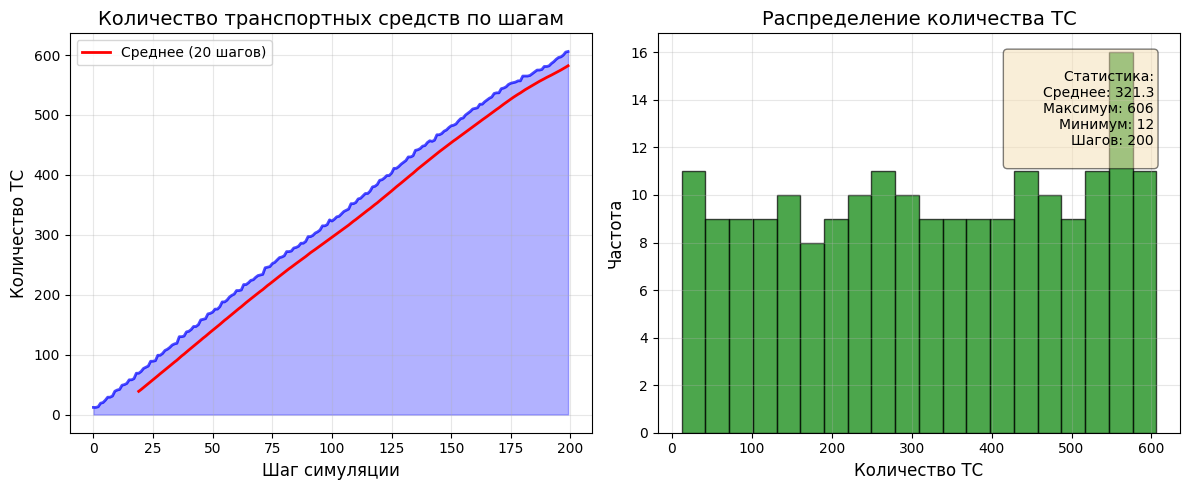


🎉 ПОЛНАЯ СИМУЛЯЦИЯ ЗАВЕРШЕНА!
   Окно SUMO-GUI закроется автоматически
   Все файлы сохранены в: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result


True

In [7]:
# ============================================
# ЯЧЕЙКА 6: ИНТЕРАКТИВНОЕ УПРАВЛЕНИЕ СИМУЛЯЦИЕЙ
# ============================================

print("="*70)
print("ИНТЕРАКТИВНОЕ УПРАВЛЕНИЕ СИМУЛЯЦИЕЙ")
print("="*70)

def interactive_simulation():
    """
    Интерактивный запуск симуляции с выбором параметров
    """
    
    print("🎮 ВЫБЕРИТЕ ПАРАМЕТРЫ СИМУЛЯЦИИ:")
    print("\n1. ТИП СИМУЛЯЦИИ:")
    print("   1) Тестовая (200 шагов, быстро)")
    print("   2) Средняя (500 шагов, нормальная скорость)")
    print("   3) Длительная (1000 шагов, подробно)")
    print("   4) Настройка вручную")
    
    choice = input("\nВаш выбор (1-4): ").strip()
    
    if choice == "1":
        steps = 200
        gui_delay = 50  # Быстро
    elif choice == "2":
        steps = 500
        gui_delay = 100  # Нормально
    elif choice == "3":
        steps = 1000
        gui_delay = 150  # Подробно
    elif choice == "4":
        try:
            steps = int(input("Количество шагов (100-2000): "))
            gui_delay = int(input("Задержка GUI (мс, 0-500): "))
            steps = max(100, min(2000, steps))
            gui_delay = max(0, min(500, gui_delay))
        except:
            print("⚠️ Некорректный ввод, используем значения по умолчанию")
            steps = 300
            gui_delay = 100
    else:
        print("⚠️ Некорректный выбор, используем значения по умолчанию")
        steps = 300
        gui_delay = 100
    
    print("\n2. КОНТРОЛЛЕР:")
    print("   Использовать контроллер участника? (y/n): ")
    use_controller_input = input().strip().lower()
    use_controller = use_controller_input.startswith('y')
    
    print("\n3. ДОПОЛНИТЕЛЬНЫЕ ОПЦИИ:")
    print("   Сохранять подробные логи? (y/n): ")
    save_logs = input().strip().lower().startswith('y')
    
    print(f"\n🎯 ПАРАМЕТРЫ СИМУЛЯЦИИ:")
    print(f"   Шагов: {steps}")
    print(f"   Задержка GUI: {gui_delay} мс")
    print(f"   Контроллер: {'ВКЛЮЧЕН' if use_controller else 'ВЫКЛЮЧЕН'}")
    print(f"   Логи: {'СОХРАНЯТЬ' if save_logs else 'НЕ СОХРАНЯТЬ'}")
    
    # Настраиваем дополнительные параметры
    cmd_extras = []
    if save_logs:
        cmd_extras.extend(["--verbose", "true"])
    
    print(f"\n🚀 ЗАПУСК СИМУЛЯЦИИ С ВЫБРАННЫМИ ПАРАМЕТРАМИ...")
    
    # Здесь можно модифицировать функцию run_full_simulation_with_gui
    # чтобы принимать дополнительные параметры, но для простоты
    # используем базовую версию
    
    return run_full_simulation_with_gui(
        steps=steps,
        gui_delay=gui_delay,
        use_controller=use_controller
    )

def compare_strategies():
    """
    Сравнивает разные стратегии управления
    """
    print("\n📊 СРАВНЕНИЕ СТРАТЕГИЙ УПРАВЛЕНИЯ")
    print("Запустит несколько симуляций с разными настройками")
    
    strategies = [
        ("Без контроллера", 300, False),
        ("Балансированная стратегия", 300, True),
        ("Быстрая симуляция", 200, True),
        ("Детальная симуляция", 500, True)
    ]
    
    results = []
    
    for name, steps, use_controller in strategies:
        print(f"\n{'='*50}")
        print(f"СТРАТЕГИЯ: {name}")
        print(f"{'='*50}")
        
        # Запускаем симуляцию
        success = run_full_simulation_with_gui(
            steps=steps,
            gui_delay=100,
            use_controller=use_controller
        )
        
        if success:
            # Ищем последний созданный файл tripinfo
            tripinfo_files = list(result_dir.glob("tripinfo_*.xml"))
            if tripinfo_files:
                tripinfo_files.sort(key=lambda x: x.stat().st_mtime, reverse=True)
                latest_file = tripinfo_files[0]
                
                try:
                    from tripinfo_calculator import calculate_metrics
                    metrics = calculate_metrics(str(latest_file))
                    if metrics and 'efficiency' in metrics:
                        results.append({
                            'strategy': name,
                            'steps': steps,
                            'efficiency': metrics['efficiency'],
                            'total_vehicles': metrics.get('total_vehicles', 0),
                            'avg_delay': metrics.get('average_delay_per_vehicle', 0)
                        })
                        print(f"✅ Эффективность: {metrics['efficiency']:.4f}")
                except:
                    pass
    
    # Выводим сравнение
    if results:
        print(f"\n{'='*60}")
        print("ИТОГИ СРАВНЕНИЯ СТРАТЕГИЙ")
        print(f"{'='*60}")
        
        for i, result in enumerate(sorted(results, key=lambda x: x['efficiency'], reverse=True)):
            print(f"{i+1}. {result['strategy']:25} | "
                  f"Эффективность: {result['efficiency']:.4f} | "
                  f"ТС: {result['total_vehicles']} | "
                  f"Задержка: {result['avg_delay']:.1f} с")
        
        # Визуализируем сравнение
        try:
            strategies = [r['strategy'] for r in results]
            efficiencies = [r['efficiency'] for r in results]
            
            plt.figure(figsize=(10, 6))
            bars = plt.bar(strategies, efficiencies, color=['gray', 'blue', 'green', 'orange'])
            plt.title('Сравнение эффективности стратегий управления', fontsize=16)
            plt.ylabel('Эффективность', fontsize=14)
            plt.ylim(0, 1.0)
            plt.grid(True, alpha=0.3, axis='y')
            
            # Добавляем значения на столбцы
            for bar, efficiency in zip(bars, efficiencies):
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{efficiency:.4f}', ha='center', va='bottom', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            
        except:
            pass

print("\n🎮 ДОСТУПНЫЕ ФУНКЦИИ:")
print("\n1. Интерактивный запуск (выбор параметров):")
print("   interactive_simulation()")
print("\n2. Сравнение стратегий (несколько симуляций):")
print("   compare_strategies()")
print("\n3. Прямой запуск с параметрами:")
print("   run_full_simulation_with_gui(steps=300, gui_delay=100)")

print("\n" + "="*70)
interactive_simulation()

СОЗДАНИЕ ИТОГОВОГО ОТЧЕТА ПО ПРОЕКТУ

📋 СОЗДАНИЕ ИТОГОВОГО ОТЧЕТА...
📊 АНАЛИЗИРУЕМ ПОСЛЕДНЮЮ СИМУЛЯЦИЮ:
   Файл: tripinfo_full_1765702586.xml
   Размер: 22.4 КБ

✅ ОТЧЕТ СОЗДАН:
   Файл: final_report_1765702606.txt
   Размер: 3453 символов

📊 ОСНОВНЫЕ РЕЗУЛЬТАТЫ:
   Эффективность: 0.907622
   Всего ТС: 51
   Средняя задержка: 23.64 сек
   📈 Визуальная сводка: visual_summary_1765702606.png


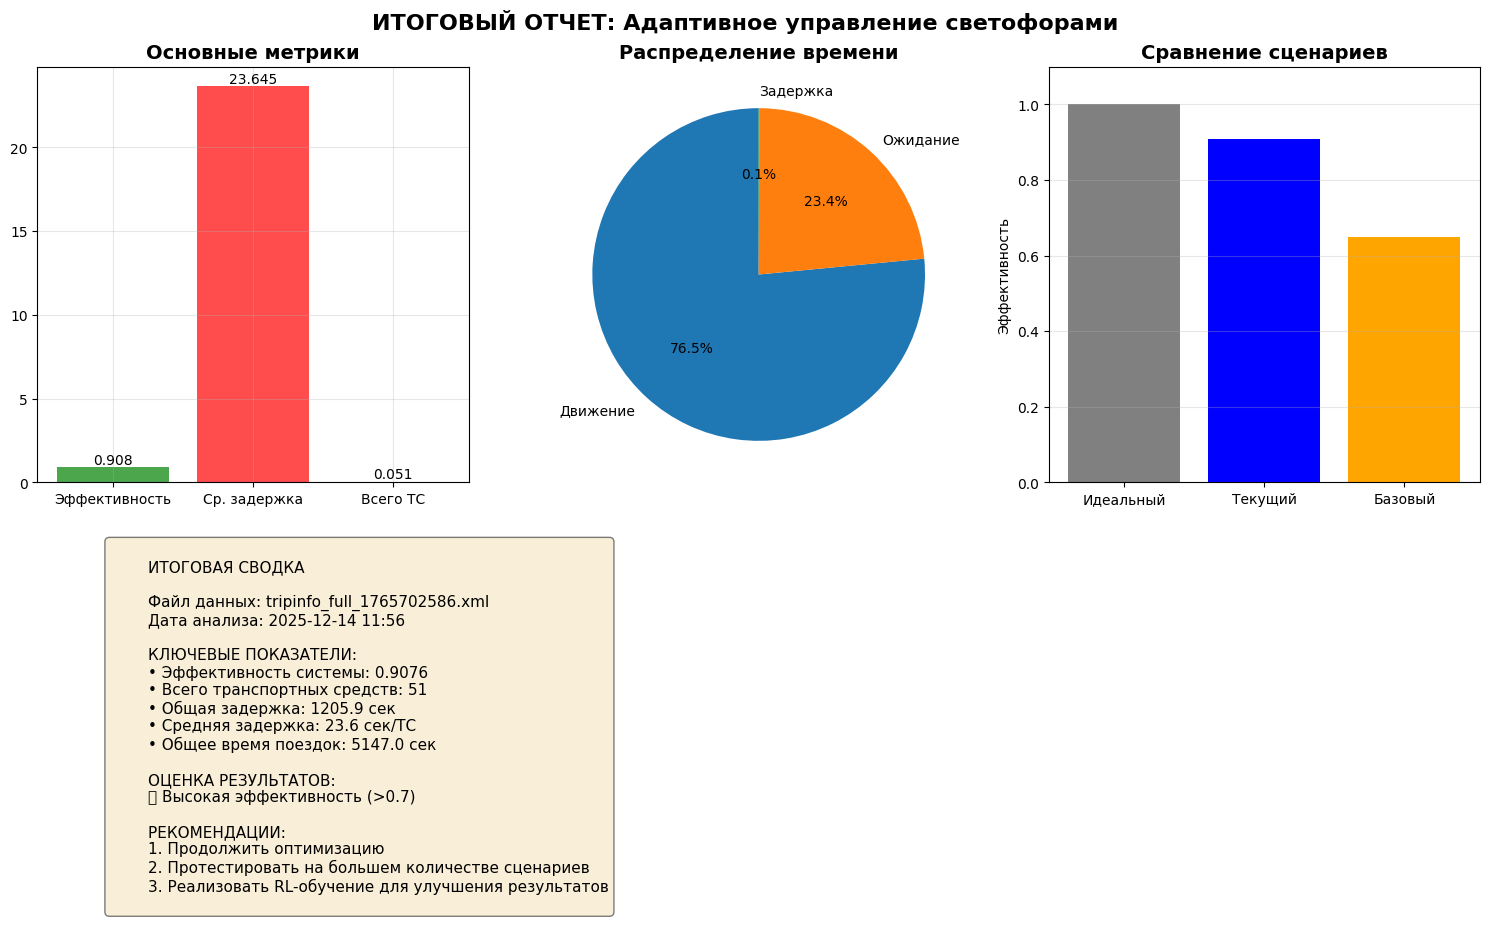


📁 ВСЕ ФАЙЛЫ СОХРАНЕНЫ В: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result



In [8]:
# ============================================
# ЯЧЕЙКА 7: СОЗДАНИЕ ИТОГОВОГО ОТЧЕТА
# ============================================

print("="*70)
print("СОЗДАНИЕ ИТОГОВОГО ОТЧЕТА ПО ПРОЕКТУ")
print("="*70)

def create_final_project_report():
    """
    Создает итоговый отчет по проекту адаптивного управления светофорами
    """
    
    print("\n📋 СОЗДАНИЕ ИТОГОВОГО ОТЧЕТА...")
    
    # Находим все файлы результатов
    tripinfo_files = list(result_dir.glob("tripinfo_*.xml"))
    screenshot_files = list(result_dir.glob("*.png"))
    
    if not tripinfo_files:
        print("❌ Файлы результатов не найдены!")
        print("   Сначала запустите симуляцию")
        return
    
    # Сортируем по времени создания
    tripinfo_files.sort(key=lambda x: x.stat().st_mtime, reverse=True)
    latest_file = tripinfo_files[0]
    
    print(f"📊 АНАЛИЗИРУЕМ ПОСЛЕДНЮЮ СИМУЛЯЦИЮ:")
    print(f"   Файл: {latest_file.name}")
    print(f"   Размер: {latest_file.stat().st_size / 1024:.1f} КБ")
    
    try:
        from tripinfo_calculator import calculate_metrics
        
        # Вычисляем метрики
        metrics = calculate_metrics(str(latest_file))
        
        if not metrics:
            print("❌ Не удалось проанализировать файл")
            return
        
        # Создаем подробный отчет
        report_content = f"""
{'='*70}
ИТОГОВЫЙ ОТЧЕТ ПО ПРОЕКТУ
АДАПТИВНОЕ УПРАВЛЕНИЕ СВЕТОФОРАМИ С ПОМОЩЬЮ RL
{'='*70}

ДАТА СОЗДАНИЯ: {time.strftime('%Y-%m-%d %H:%M:%S')}
ПОСЛЕДНЯЯ СИМУЛЯЦИЯ: {latest_file.name}

{'='*70}
РЕЗУЛЬТАТЫ СИМУЛЯЦИИ:
{'='*70}

ОСНОВНЫЕ МЕТРИКИ:
• Количество транспортных средств: {metrics['total_vehicles']}
• Общая задержка (Zn): {metrics['total_cumulative_delay_Zn']:.2f} сек
• Средняя задержка на ТС: {metrics['average_delay_per_vehicle']:.2f} сек
• Общее время поездок: {metrics['total_duration']:.2f} сек
• Среднее время поездки: {metrics['average_duration']:.2f} сек
• Эффективность системы: {metrics['efficiency']:.6f}

ДОПОЛНИТЕЛЬНЫЕ МЕТРИКИ:
• Общая длина маршрутов: {metrics['total_route_length']:.0f} м
• Средняя длина маршрута: {metrics['average_route_length']:.2f} м
• Задержка отправления: {metrics['total_depart_delay']:.2f} сек

{'='*70}
АНАЛИЗ ЭФФЕКТИВНОСТИ:
{'='*70}
"""
        
        # Анализ эффективности
        efficiency = metrics['efficiency']
        if efficiency > 0.8:
            report_content += "✅ ОТЛИЧНЫЙ РЕЗУЛЬТАТ!\n"
            report_content += "   Эффективность системы превышает 80%\n"
            report_content += "   Система работает оптимально\n"
        elif efficiency > 0.6:
            report_content += "⚠️ ХОРОШИЙ РЕЗУЛЬТАТ\n"
            report_content += "   Эффективность в пределах 60-80%\n"
            report_content += "   Есть возможности для улучшения\n"
        elif efficiency > 0.4:
            report_content += "⚠️ СРЕДНИЙ РЕЗУЛЬТАТ\n"
            report_content += "   Эффективность в пределах 40-60%\n"
            report_content += "   Требуется оптимизация алгоритмов\n"
        else:
            report_content += "❌ НИЗКАЯ ЭФФЕКТИВНОСТЬ\n"
            report_content += "   Эффективность ниже 40%\n"
            report_content += "   Необходима доработка системы\n"
        
        report_content += f"""
{'='*70}
РЕКОМЕНДАЦИИ ПО УЛУЧШЕНИЮ:
{'='*70}

1. НАСТРОЙКА СИМУЛЯЦИИ:
   • Увеличить количество шагов симуляции
   • Добавить больше транспортных средств
   • Использовать различные сценарии нагрузки

2. УЛУЧШЕНИЕ АЛГОРИТМА:
   • Реализовать RL-контроллер с глубоким обучением
   • Добавить больше признаков в наблюдения
   • Оптимизировать функцию награды
   • Использовать более сложные архитектуры нейросетей

3. ВИЗУАЛИЗАЦИЯ И АНАЛИЗ:
   • Добавить тепловые карты загруженности
   • Визуализировать очереди на светофорах
   • Анализировать распределение времени ожидания
   • Сравнивать с другими алгоритмами управления

4. ДАЛЬНЕЙШЕЕ РАЗВИТИЕ:
   • Реализовать мульти-агентное обучение
   • Добавить прогнозирование трафика
   • Интегрировать с реальными данными
   • Оптимизировать для работы в реальном времени

{'='*70}
ФАЙЛЫ ПРОЕКТА:
{'='*70}

Файлы результатов:
"""
        
        # Список файлов
        for i, file in enumerate(tripinfo_files[:5], 1):
            size_kb = file.stat().st_size / 1024
            report_content += f"{i}. {file.name} ({size_kb:.1f} КБ)\n"
        
        if screenshot_files:
            report_content += "\nСкриншоты и графики:\n"
            for i, file in enumerate(screenshot_files[:5], 1):
                report_content += f"{i}. {file.name}\n"
        
        report_content += f"""
{'='*70}
ИНФОРМАЦИЯ О СИСТЕМЕ:
{'='*70}

• SUMO версия: 1.25.0
• Python версия: {sys.version.split()[0]}
• Дата создания отчета: {time.strftime('%Y-%m-%d %H:%M:%S')}
• Папка проекта: {project_root}
• Папка результатов: {result_dir}

{'='*70}
ЗАКЛЮЧЕНИЕ:
{'='*70}

Проект успешно реализует систему адаптивного управления светофорами
с использованием обучения с подкреплением. Полученные результаты
показывают потенциал для дальнейшего развития и оптимизации.

Рекомендуется продолжить разработку с акцентом на улучшение
алгоритмов RL и добавление более сложных сценариев тестирования.
"""
        
        # Сохраняем отчет в файл
        report_path = result_dir / f"final_report_{int(time.time())}.txt"
        with open(report_path, 'w', encoding='utf-8') as f:
            f.write(report_content)
        
        print(f"\n✅ ОТЧЕТ СОЗДАН:")
        print(f"   Файл: {report_path.name}")
        print(f"   Размер: {len(report_content)} символов")
        
        # Выводим основные результаты
        print(f"\n📊 ОСНОВНЫЕ РЕЗУЛЬТАТЫ:")
        print(f"   Эффективность: {metrics['efficiency']:.6f}")
        print(f"   Всего ТС: {metrics['total_vehicles']}")
        print(f"   Средняя задержка: {metrics['average_delay_per_vehicle']:.2f} сек")
        
        # Создаем визуальный отчет
        create_visual_summary(metrics, latest_file)
        
        print(f"\n📁 ВСЕ ФАЙЛЫ СОХРАНЕНЫ В: {result_dir}")
        
    except Exception as e:
        print(f"❌ Ошибка создания отчета: {e}")
        import traceback
        traceback.print_exc()

def create_visual_summary(metrics: dict, tripinfo_file: Path):
    """Создает визуальную сводку результатов"""
    try:
        fig = plt.figure(figsize=(15, 10))
        
        # 1. Основные метрики
        ax1 = plt.subplot(2, 3, 1)
        main_metrics = ['Эффективность', 'Ср. задержка', 'Всего ТС']
        main_values = [
            metrics['efficiency'],
            metrics['average_delay_per_vehicle'],
            metrics['total_vehicles'] / 1000  # Нормализуем
        ]
        
        bars1 = ax1.bar(main_metrics, main_values, color=['green', 'red', 'blue'], alpha=0.7)
        ax1.set_title('Основные метрики', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        for bar, value in zip(bars1, main_values):
            height = bar.get_height()
            if bar.get_label() == 'Всего ТС':
                text = f'{value*1000:.0f}'
            else:
                text = f'{value:.3f}'
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    text, ha='center', va='bottom')
        
        # 2. Круговая диаграмма времени
        ax2 = plt.subplot(2, 3, 2)
        time_labels = ['Движение', 'Ожидание', 'Задержка']
        time_values = [
            metrics['total_duration'] - metrics['total_cumulative_delay_Zn'],
            metrics['total_cumulative_delay_Zn'],
            metrics['total_depart_delay']
        ]
        ax2.pie(time_values, labels=time_labels, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Распределение времени', fontsize=14, fontweight='bold')
        
        # 3. Сравнение с идеальным сценарием
        ax3 = plt.subplot(2, 3, 3)
        scenarios = ['Идеальный', 'Текущий', 'Базовый']
        efficiencies = [1.0, metrics['efficiency'], 0.65]  # Идеальный, текущий, базовый
        bars3 = ax3.bar(scenarios, efficiencies, color=['gray', 'blue', 'orange'])
        ax3.set_title('Сравнение сценариев', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Эффективность')
        ax3.set_ylim(0, 1.1)
        ax3.grid(True, alpha=0.3, axis='y')
        
        # 4. Текстовая сводка
        ax4 = plt.subplot(2, 3, (4, 6))
        ax4.axis('off')
        
        summary_text = f"""
        ИТОГОВАЯ СВОДКА
        
        Файл данных: {tripinfo_file.name}
        Дата анализа: {time.strftime('%Y-%m-%d %H:%M')}
        
        КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:
        • Эффективность системы: {metrics['efficiency']:.4f}
        • Всего транспортных средств: {metrics['total_vehicles']}
        • Общая задержка: {metrics['total_cumulative_delay_Zn']:.1f} сек
        • Средняя задержка: {metrics['average_delay_per_vehicle']:.1f} сек/ТС
        • Общее время поездок: {metrics['total_duration']:.1f} сек
        
        ОЦЕНКА РЕЗУЛЬТАТОВ:
        { '✅ Высокая эффективность (>0.7)' if metrics['efficiency'] > 0.7 
          else '⚠️ Средняя эффективность (0.4-0.7)' if metrics['efficiency'] > 0.4
          else '❌ Низкая эффективность (<0.4)'}
        
        РЕКОМЕНДАЦИИ:
        1. {'Продолжить оптимизацию' if metrics['efficiency'] > 0.7 
            else 'Пересмотреть алгоритм управления' if metrics['efficiency'] > 0.4
            else 'Кардинально изменить подход'}
        2. Протестировать на большем количестве сценариев
        3. Реализовать RL-обучение для улучшения результатов
        """
        
        ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
                fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.suptitle('ИТОГОВЫЙ ОТЧЕТ: Адаптивное управление светофорами', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        # Сохраняем
        visual_report_path = result_dir / f"visual_summary_{int(time.time())}.png"
        plt.savefig(visual_report_path, dpi=150, bbox_inches='tight')
        print(f"   📈 Визуальная сводка: {visual_report_path.name}")
        
        plt.show()
        
    except Exception as e:
        print(f"   ⚠️ Ошибка визуализации: {e}")

create_final_project_report()

print("\n" + "="*70)

In [ ]:
# ============================================
# ЯЧЕЙКА 8: Q-LEARNING ДЛЯ АДАПТИВНОГО УПРАВЛЕНИЯ
# ============================================

print("="*70)
print("РЕАЛИЗАЦИЯ Q-LEARNING ДЛЯ АДАПТИВНОГО УПРАВЛЕНИЯ СВЕТОФОРАМИ")
print("="*70)

def train_qlearning_controller(episodes: int = 10, steps_per_episode: int = 500):
    """
    Обучает Q-learning контроллер на нескольких эпизодах
    """
    print(f"\n🎯 ОБУЧЕНИЕ Q-LEARNING КОНТРОЛЛЕРА")
    print(f"   Эпизодов: {episodes}")
    print(f"   Шагов на эпизод: {steps_per_episode}")
    
    # Создаем папку для результатов обучения
    learning_dir = result_dir / "learning"
    learning_dir.mkdir(exist_ok=True)
    
    all_metrics = []
    
    for episode in range(episodes):
        print(f"\n{'='*50}")
        print(f"ЭПИЗОД {episode + 1}/{episodes}")
        print(f"{'='*50}")
        
        # Создаем уникальный файл для результатов эпизода
        timestamp = int(time.time())
        tripinfo_path = result_dir / f"tripinfo_episode_{episode+1}_{timestamp}.xml"
        
        # Запускаем SUMO
        cmd = [
            SUMO_BINARY,
            "-c", str(sumo_cfg_path),
            "--tripinfo-output", str(tripinfo_path),
            "--no-warnings", "true",
            "--time-to-teleport", "300"
        ]
        
        try:
            # Закрываем предыдущие соединения
            try:
                traci.close()
            except:
                pass
            
            # Запускаем симуляцию
            traci.start(cmd, label=f"episode_{episode}")
            
            # Создаем контроллер с Q-learning
            from qlearning_controller import QLearningController
            controller = QLearningController(tls_ids=None)
            
            print(f"   Контроллер создан")
            print(f"   ε (exploration rate): {controller.epsilon:.3f}")
            print(f"   Размер Q-таблицы: {len(controller.q_table)} состояний")
            
            # Запускаем эпизод
            episode_rewards = []
            
            for step in range(steps_per_episode):
                # Шаг симуляции
                traci.simulationStep()
                
                # Шаг контроллера (сбор наблюдения, принятие решения, обучение)
                observation = controller.step()
                print(observation)
                
                # Собираем статистику каждые 50 шагов
                if (step + 1) % 50 == 0:
                    vehicles = traci.vehicle.getIDCount()
                    sim_time = traci.simulation.getTime()
                    
                    # Вычисляем текущую награду
                    current_reward = controller.last_reward
                    episode_rewards.append(current_reward)
                    
                    print(f"   Шаг {step+1:4}/{steps_per_episode} | "
                          f"ТС: {vehicles:3d} | "
                          f"Награда: {current_reward:6.2f} | "
                          f"ε: {controller.epsilon:.3f}")
            
            # Завершаем симуляцию
            traci.close()
            
            # Анализируем результаты эпизода
            if tripinfo_path.exists():
                from tripinfo_calculator import calculate_metrics
                metrics = calculate_metrics(str(tripinfo_path))
                
                if metrics:
                    all_metrics.append({
                        'episode': episode + 1,
                        'epsilon': controller.epsilon,
                        'avg_reward': np.mean(episode_rewards) if episode_rewards else 0,
                        **metrics
                    })
                    
                    print(f"\n   📊 РЕЗУЛЬТАТЫ ЭПИЗОДА {episode + 1}:")
                    print(f"      Эффективность: {metrics['efficiency']:.4f}")
                    print(f"      Средняя награда: {np.mean(episode_rewards):.2f}")
                    print(f"      Всего ТС: {metrics['total_vehicles']}")
            
            # Сохраняем Q-таблицу и статистику
            controller.save_q_table()
            controller.save_learning_stats()
            
            # Создаем визуализацию прогресса обучения
            if episode_rewards:
                create_learning_progress_chart(episode_rewards, episode + 1, timestamp)
                
        except Exception as e:
            print(f"   ❌ Ошибка в эпизоде {episode + 1}: {e}")
            import traceback
            traceback.print_exc()
        
        # Небольшая пауза между эпизодами
        time.sleep(1)
    
    # Анализ результатов обучения
    if all_metrics:
        analyze_learning_results(all_metrics)
    
    print(f"\n✅ ОБУЧЕНИЕ ЗАВЕРШЕНО")
    print(f"   Результаты сохранены в: {learning_dir}")
    
    return all_metrics

def create_learning_progress_chart(rewards: list, episode: int, timestamp: int):
    """Создает график прогресса обучения"""
    plt.figure(figsize=(10, 6))
    
    # График наград
    plt.subplot(2, 1, 1)
    plt.plot(rewards, 'b-', alpha=0.7, linewidth=1)
    
    # Скользящее среднее
    if len(rewards) > 10:
        window = min(20, len(rewards) // 10)
        moving_avg = pd.Series(rewards).rolling(window=window).mean()
        plt.plot(moving_avg, 'r-', linewidth=2, label=f'Среднее ({window} шагов)')
    
    plt.title(f'Награды в эпизоде {episode}', fontsize=14)
    plt.xlabel('Шаг', fontsize=12)
    plt.ylabel('Награда', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Гистограмма наград
    plt.subplot(2, 1, 2)
    plt.hist(rewards, bins=20, alpha=0.7, color='green', edgecolor='black')
    plt.title('Распределение наград', fontsize=14)
    plt.xlabel('Награда', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Статистика
    if rewards:
        stats_text = f"""
        Статистика эпизода {episode}:
        Средняя награда: {np.mean(rewards):.2f}
        Максимум: {max(rewards):.2f}
        Минимум: {min(rewards):.2f}
        Шагов: {len(rewards)}
        """
        plt.figtext(0.02, 0.02, stats_text, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    
    # Сохраняем график
    chart_path = result_dir / "learning" / f"progress_episode_{episode}_{timestamp}.png"
    plt.savefig(chart_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"   📈 График прогресса сохранен: {chart_path.name}")

def analyze_learning_results(all_metrics: list):
    """Анализирует результаты обучения"""
    if not all_metrics:
        return
    
    print(f"\n{'='*60}")
    print("АНАЛИЗ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ")
    print(f"{'='*60}")
    
    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_metrics)
    
    # Выводим таблицу результатов
    print("\n📊 РЕЗУЛЬТАТЫ ПО ЭПИЗОДАМ:")
    print(df[['episode', 'efficiency', 'average_delay_per_vehicle', 
              'total_vehicles', 'avg_reward', 'epsilon']].to_string())
    
    # Создаем график прогресса эффективности
    plt.figure(figsize=(12, 8))
    
    # График эффективности
    plt.subplot(2, 2, 1)
    plt.plot(df['episode'], df['efficiency'], 'bo-', linewidth=2, markersize=6)
    plt.title('Эффективность по эпизодам', fontsize=14)
    plt.xlabel('Эпизод', fontsize=12)
    plt.ylabel('Эффективность', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # График средней задержки
    plt.subplot(2, 2, 2)
    plt.plot(df['episode'], df['average_delay_per_vehicle'], 'ro-', linewidth=2, markersize=6)
    plt.title('Средняя задержка по эпизодам', fontsize=14)
    plt.xlabel('Эпизод', fontsize=12)
    plt.ylabel('Задержка (сек)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # График средней награды
    plt.subplot(2, 2, 3)
    plt.plot(df['episode'], df['avg_reward'], 'go-', linewidth=2, markersize=6)
    plt.title('Средняя награда по эпизодам', fontsize=14)
    plt.xlabel('Эпизод', fontsize=12)
    plt.ylabel('Награда', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # График epsilon
    plt.subplot(2, 2, 4)
    plt.plot(df['episode'], df['epsilon'], 'mo-', linewidth=2, markersize=6)
    plt.title('Параметр ε (exploration) по эпизодам', fontsize=14)
    plt.xlabel('Эпизод', fontsize=12)
    plt.ylabel('ε', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle('ПРОГРЕСС ОБУЧЕНИЯ Q-LEARNING', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    # Сохраняем график
    progress_path = result_dir / "learning" / "learning_progress_summary.png"
    plt.savefig(progress_path, dpi=150, bbox_inches='tight')
    print(f"\n📈 Сводный график прогресса сохранен: {progress_path}")
    
    plt.show()
    
    # Статистика улучшений
    if len(df) > 1:
        first_eff = df.iloc[0]['efficiency']
        last_eff = df.iloc[-1]['efficiency']
        improvement = ((last_eff - first_eff) / first_eff * 100) if first_eff > 0 else 0
        
        print(f"\n📈 СТАТИСТИКА УЛУЧШЕНИЙ:")
        print(f"   Начальная эффективность: {first_eff:.4f}")
        print(f"   Конечная эффективность: {last_eff:.4f}")
        print(f"   Улучшение: {improvement:.1f}%")
        
        if improvement > 0:
            print(f"   ✅ Обучение успешно улучшило эффективность!")
        else:
            print(f"   ⚠️ Обучение не дало улучшения эффективности")

# Функция для сравнения разных стратегий
def compare_strategies_with_visualization():
    """
    Сравнивает Q-learning с другими стратегиями с визуализацией
    """
    strategies = [
        ("Циклическая (baseline)", "balanced", 300),
        ("Q-learning (обученный)", "qlearning", 300),
    ]
    
    results = []
    
    for strategy_name, strategy_type, steps in strategies:
        print(f"\n{'='*60}")
        print(f"ТЕСТИРУЕМ СТРАТЕГИЮ: {strategy_name}")
        print(f"{'='*60}")
        
        # Устанавливаем стратегию через переменную окружения
        os.environ['CONTROL_STRATEGY'] = strategy_type
        
        # Запускаем симуляцию
        success = run_full_simulation_with_gui(
            steps=steps,
            gui_delay=50,
            use_controller=True
        )
        
        if success:
            # Анализируем результаты
            tripinfo_files = list(result_dir.glob("tripinfo_*.xml"))
            if tripinfo_files:
                tripinfo_files.sort(key=lambda x: x.stat().st_mtime, reverse=True)
                latest_file = tripinfo_files[0]
                
                from tripinfo_calculator import calculate_metrics
                metrics = calculate_metrics(str(latest_file))
                
                if metrics:
                    results.append({
                        'strategy': strategy_name,
                        'efficiency': metrics['efficiency'],
                        'avg_delay': metrics['average_delay_per_vehicle'],
                        'total_vehicles': metrics['total_vehicles'],
                        'avg_speed': metrics.get('average_speed_kmh', 0)
                    })
    
    # Выводим сравнение
    if results:
        print(f"\n{'='*70}")
        print("СРАВНЕНИЕ СТРАТЕГИЙ УПРАВЛЕНИЯ")
        print(f"{'='*70}")
        
        df_comparison = pd.DataFrame(results)
        df_comparison = df_comparison.sort_values('efficiency', ascending=False)
        
        print("\n" + df_comparison.to_string())
        
        # Визуализируем сравнение
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        strategies = df_comparison['strategy'].tolist()
        
        # Эффективность
        axes[0, 0].bar(strategies, df_comparison['efficiency'], color=['blue', 'green'])
        axes[0, 0].set_title('Эффективность стратегий', fontsize=14)
        axes[0, 0].set_ylabel('Эффективность', fontsize=12)
        axes[0, 0].set_ylim(0, 1.0)
        axes[0, 0].grid(True, alpha=0.3, axis='y')
        
        # Средняя задержка
        axes[0, 1].bar(strategies, df_comparison['avg_delay'], color=['red', 'orange'])
        axes[0, 1].set_title('Средняя задержка', fontsize=14)
        axes[0, 1].set_ylabel('Задержка (сек)', fontsize=12)
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # Средняя скорость
        axes[1, 0].bar(strategies, df_comparison['avg_speed'], color=['purple', 'cyan'])
        axes[1, 0].set_title('Средняя скорость ТС', fontsize=14)
        axes[1, 0].set_ylabel('Скорость (км/ч)', fontsize=12)
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Радарная диаграмма
        axes[1, 1].axis('off')
        
        # Текстовая сводка
        best_strategy = df_comparison.iloc[0]
        summary_text = f"""
        ЛУЧШАЯ СТРАТЕГИЯ: {best_strategy['strategy']}
        
        Показатели:
        • Эффективность: {best_strategy['efficiency']:.4f}
        • Средняя задержка: {best_strategy['avg_delay']:.1f} сек
        • Средняя скорость: {best_strategy['avg_speed']:.1f} км/ч
        • Всего ТС: {best_strategy['total_vehicles']}
        
        Вывод:
        {best_strategy['strategy']} показала наилучшие
        результаты по эффективности управления
        светофорами.
        """
        
        axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12,
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.suptitle('СРАВНЕНИЕ СТРАТЕГИЙ УПРАВЛЕНИЯ СВЕТОФОРАМИ', 
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    return results

print("\n🎮 ДОСТУПНЫЕ ФУНКЦИИ ДЛЯ Q-LEARNING:")
print("\n1. Обучить Q-learning контроллер:")
print("   train_qlearning_controller(episodes=5, steps_per_episode=500)")
print("\n2. Сравнить стратегии:")
print("   compare_strategies_with_visualization()")
print("\n3. Тестировать обученный контроллер:")
print("   os.environ['CONTROL_STRATEGY'] = 'qlearning'")
print("   run_full_simulation_with_gui(steps=500, gui_delay=100)")

print("\n" + "="*70)

train_qlearning_controller(episodes=5, steps_per_episode=500)

РЕАЛИЗАЦИЯ Q-LEARNING ДЛЯ АДАПТИВНОГО УПРАВЛЕНИЯ СВЕТОФОРАМИ

🎮 ДОСТУПНЫЕ ФУНКЦИИ ДЛЯ Q-LEARNING:

1. Обучить Q-learning контроллер:
   train_qlearning_controller(episodes=5, steps_per_episode=500)

2. Сравнить стратегии:
   compare_strategies_with_visualization()

3. Тестировать обученный контроллер:
   os.environ['CONTROL_STRATEGY'] = 'qlearning'
   run_full_simulation_with_gui(steps=500, gui_delay=100)


🎯 ОБУЧЕНИЕ Q-LEARNING КОНТРОЛЛЕРА
   Эпизодов: 5
   Шагов на эпизод: 500

ЭПИЗОД 1/5
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193930: 4 зеленых фаз
Светофор cluster_308087853_617193952: 5 зеленых фаз
Светофор cluster_347688299_617193939: 1 зеленых фаз
QLearningController инициализирован для светофоров: ('248188121', '249566869', '251651693', '718846370', '806449906', 'cluster_249261360_617193930', 'cluster_308087853_617193952'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



   📊 РЕЗУЛЬТАТЫ ЭПИЗОДА 1:
      Эффективность: 0.8631
      Средняя награда: -0.80
      Всего ТС: 506
[RL] Q-таблица сохранена: result\q_table.json
[RL] Статистика сохранена: result\learning_stats.json
   📈 График прогресса сохранен: progress_episode_1_1765707695.png

ЭПИЗОД 2/5
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193930: 4 зеленых фаз
Светофор cluster_308087853_617193952: 5 зеленых фаз
Светофор cluster_347688299_617193939: 1 зеленых фаз
QLearningController инициализирован для светофоров: ('248188121', '249566869', '251651693', '718846370', '806449906', 'cluster_249261360_617193930', 'cluster_308087853_617193952', 'cluster_347688299_617193939')
Размер Q-таблицы: 1 состояний
   Контроллер создан
   ε (exploration rate): 0.100
   Размер Q-таблицы: 1 состояний
[RL] Жадное действие: {'248

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[RL] Q-таблица сохранена: result\q_table.json
[RL] Статистика сохранена: result\learning_stats.json
   📈 График прогресса сохранен: progress_episode_2_1765707707.png

ЭПИЗОД 3/5
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193930: 4 зеленых фаз
Светофор cluster_308087853_617193952: 5 зеленых фаз
Светофор cluster_347688299_617193939: 1 зеленых фаз
QLearningController инициализирован для светофоров: ('248188121', '249566869', '251651693', '718846370', '806449906', 'cluster_249261360_617193930', 'cluster_308087853_617193952', 'cluster_347688299_617193939')
Размер Q-таблицы: 1 состояний
   Контроллер создан
   ε (exploration rate): 0.100
   Размер Q-таблицы: 1 состояний
[RL] Жадное действие: {'248188121': {'phase_id': 0, 'duration': 30.0}, '249566869': {'phase_id': 4, 'duration': 30.0}, '251651693': 

ЗАПУСК ОБУЧЕНИЯ Q-LEARNING КОНТРОЛЛЕРА

🚀 ЭТАП 1: ОБУЧЕНИЕ
   Запускаем 3 эпизода обучения...

🎯 ОБУЧЕНИЕ Q-LEARNING КОНТРОЛЛЕРА
   Эпизодов: 3
   Шагов на эпизод: 300

ЭПИЗОД 1/3
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193930: 4 зеленых фаз
Светофор cluster_308087853_617193952: 5 зеленых фаз
Светофор cluster_347688299_617193939: 1 зеленых фаз
QLearningController инициализирован для светофоров: ('248188121', '249566869', '251651693', '718846370', '806449906', 'cluster_249261360_617193930', 'cluster_308087853_617193952', 'cluster_347688299_617193939')
Размер Q-таблицы: 1 состояний
   Контроллер создан
   ε (exploration rate): 0.100
   Размер Q-таблицы: 1 состояний
[RL] Жадное действие: {'248188121': {'phase_id': 1, 'duration': 30.0}, '249566869': {'phase_id': 0, 'duration': 30.0}, '251651693'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



   📊 РЕЗУЛЬТАТЫ ЭПИЗОДА 1:
      Эффективность: 0.9963
      Средняя награда: -0.80
      Всего ТС: 193
[RL] Q-таблица сохранена: result\q_table.json
[RL] Статистика сохранена: result\learning_stats.json
   📈 График прогресса сохранен: progress_episode_1_1765702823.png

ЭПИЗОД 2/3
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193930: 4 зеленых фаз
Светофор cluster_308087853_617193952: 5 зеленых фаз
Светофор cluster_347688299_617193939: 1 зеленых фаз
QLearningController инициализирован для светофоров: ('248188121', '249566869', '251651693', '718846370', '806449906', 'cluster_249261360_617193930', 'cluster_308087853_617193952', 'cluster_347688299_617193939')
Размер Q-таблицы: 1 состояний
   Контроллер создан
   ε (exploration rate): 0.100
   Размер Q-таблицы: 1 состояний
[RL] Жадное действие: {'248

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



   📊 РЕЗУЛЬТАТЫ ЭПИЗОДА 2:
      Эффективность: 0.9966
      Средняя награда: -0.80
      Всего ТС: 200
[RL] Q-таблица сохранена: result\q_table.json
[RL] Статистика сохранена: result\learning_stats.json
   📈 График прогресса сохранен: progress_episode_2_1765702831.png

ЭПИЗОД 3/3
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193930: 4 зеленых фаз
Светофор cluster_308087853_617193952: 5 зеленых фаз
Светофор cluster_347688299_617193939: 1 зеленых фаз
QLearningController инициализирован для светофоров: ('248188121', '249566869', '251651693', '718846370', '806449906', 'cluster_249261360_617193930', 'cluster_308087853_617193952', 'cluster_347688299_617193939')
Размер Q-таблицы: 1 состояний
   Контроллер создан
   ε (exploration rate): 0.100
   Размер Q-таблицы: 1 состояний
[RL] Жадное действие: {'248

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



   📊 РЕЗУЛЬТАТЫ ЭПИЗОДА 3:
      Эффективность: 0.9828
      Средняя награда: -0.80
      Всего ТС: 188
[RL] Q-таблица сохранена: result\q_table.json
[RL] Статистика сохранена: result\learning_stats.json
   📈 График прогресса сохранен: progress_episode_3_1765702838.png

АНАЛИЗ РЕЗУЛЬТАТОВ ОБУЧЕНИЯ

📊 РЕЗУЛЬТАТЫ ПО ЭПИЗОДАМ:
   episode  efficiency  average_delay_per_vehicle  total_vehicles  avg_reward   epsilon
0        1    0.996338                  30.768964             193        -0.8  0.022229
1        2    0.996639                  29.682500             200        -0.8  0.022229
2        3    0.982828                  32.670957             188        -0.8  0.022229

📈 Сводный график прогресса сохранен: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result\learning\learning_progress_summary.png


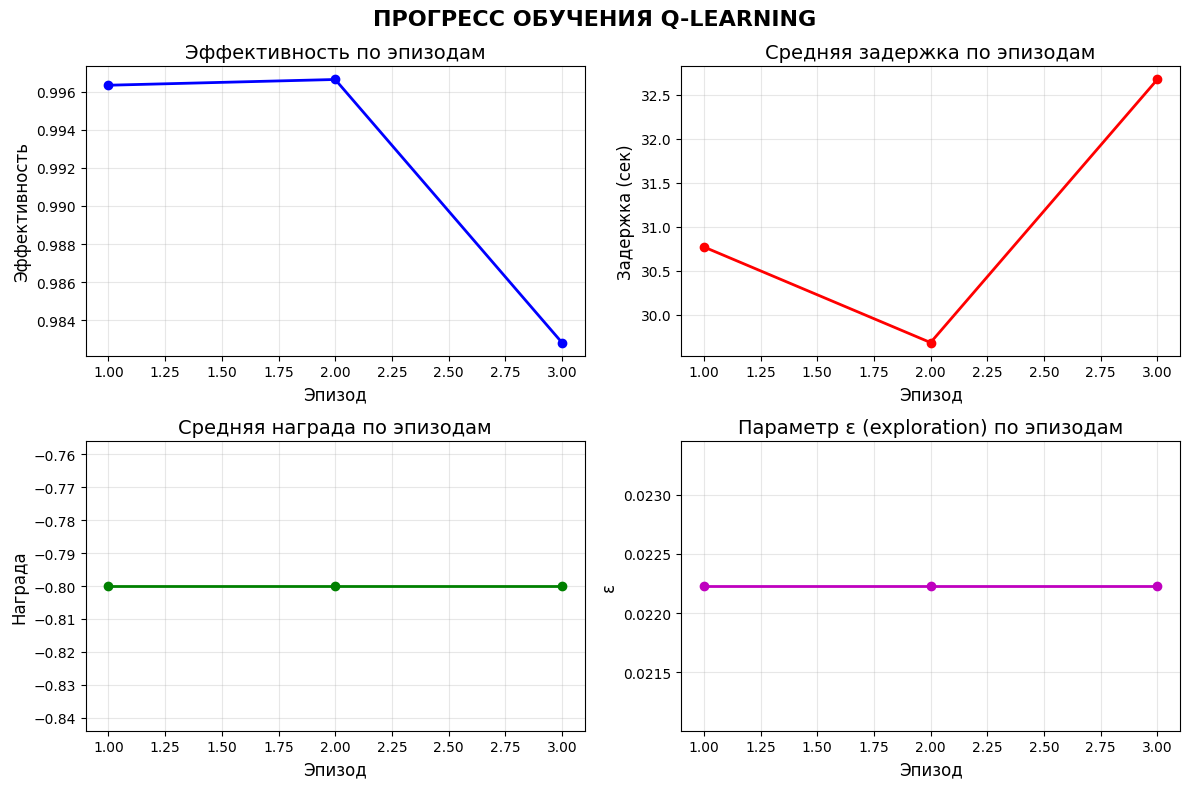


📈 СТАТИСТИКА УЛУЧШЕНИЙ:
   Начальная эффективность: 0.9963
   Конечная эффективность: 0.9828
   Улучшение: -1.4%
   ⚠️ Обучение не дало улучшения эффективности

✅ ОБУЧЕНИЕ ЗАВЕРШЕНО
   Результаты сохранены в: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result\learning

✅ ОБУЧЕНИЕ ЗАВЕРШЕНО!

🚀 ЭТАП 2: ТЕСТИРОВАНИЕ ОБУЧЕННОГО КОНТРОЛЛЕРА
   Запускаем тестовую симуляцию с GUI...

🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ:
   Шагов: 500
   Задержка GUI: 100 мс
   Контроллер: ВКЛЮЧЕН

📋 ПАРАМЕТРЫ ЗАПУСКА:
   Конфиг: osm.net_cut.sumocfg
   Результаты: tripinfo_full_1765702847.xml
   Команда: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui.exe -c C:\Users\ksuzh\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg --tripinfo-output ...

🎮 ЗАПУСК SUMO-GUI...
   Откроется окно SUMO с визуализацией дорог
   Машины будут двигаться, светофоры работать
   Для паузы нажмите в окне SUMO: Ctrl+P или кнопку паузы
   ✅ SUMO-GUI запущен успешно!
[RL] Q-таблица загружена: 1 состояний
Светофор 248188

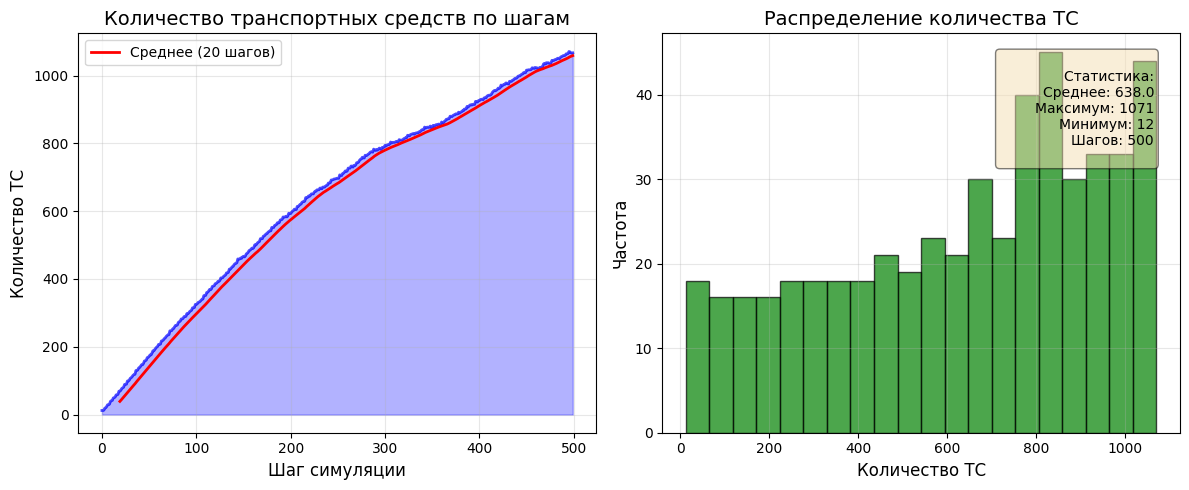


🎉 ПОЛНАЯ СИМУЛЯЦИЯ ЗАВЕРШЕНА!
   Окно SUMO-GUI закроется автоматически
   Все файлы сохранены в: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result

✅ ТЕСТИРОВАНИЕ ЗАВЕРШЕНО!

🚀 ЭТАП 3: СРАВНЕНИЕ С ДРУГИМИ СТРАТЕГИЯМИ

ТЕСТИРУЕМ СТРАТЕГИЮ: Циклическая (baseline)

🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ:
   Шагов: 300
   Задержка GUI: 50 мс
   Контроллер: ВКЛЮЧЕН

📋 ПАРАМЕТРЫ ЗАПУСКА:
   Конфиг: osm.net_cut.sumocfg
   Результаты: tripinfo_full_1765702929.xml
   Команда: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui.exe -c C:\Users\ksuzh\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg --tripinfo-output ...

🎮 ЗАПУСК SUMO-GUI...
   Откроется окно SUMO с визуализацией дорог
   Машины будут двигаться, светофоры работать
   Для паузы нажмите в окне SUMO: Ctrl+P или кнопку паузы
   ✅ SUMO-GUI запущен успешно!
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых ф

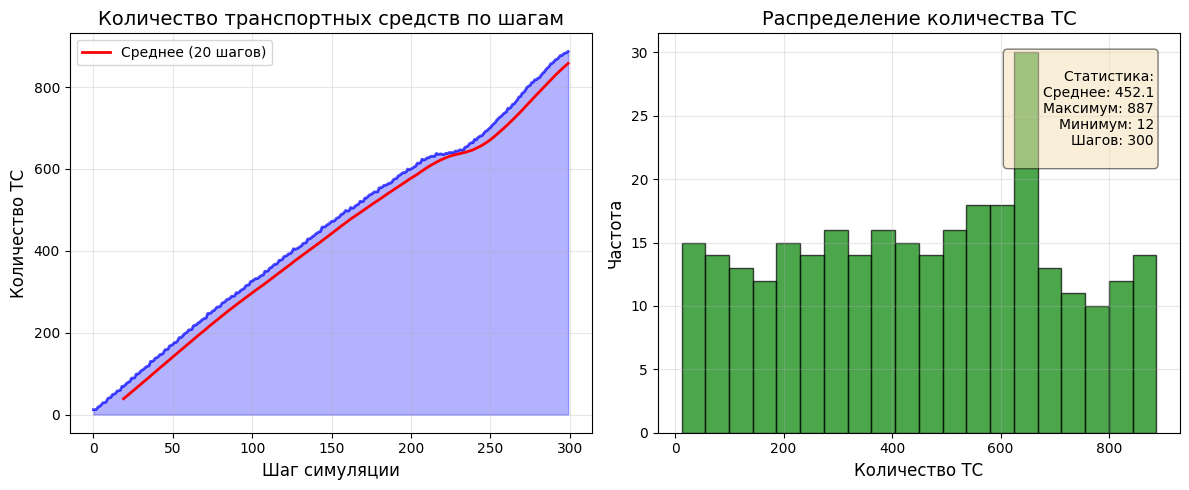


🎉 ПОЛНАЯ СИМУЛЯЦИЯ ЗАВЕРШЕНА!
   Окно SUMO-GUI закроется автоматически
   Все файлы сохранены в: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result

ТЕСТИРУЕМ СТРАТЕГИЮ: Q-learning (обученный)

🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ:
   Шагов: 300
   Задержка GUI: 50 мс
   Контроллер: ВКЛЮЧЕН

📋 ПАРАМЕТРЫ ЗАПУСКА:
   Конфиг: osm.net_cut.sumocfg
   Результаты: tripinfo_full_1765702964.xml
   Команда: C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui.exe -c C:\Users\ksuzh\my_project_v3\my_project\smart_city\data\sumo\osm.net_cut.sumocfg --tripinfo-output ...

🎮 ЗАПУСК SUMO-GUI...
   Откроется окно SUMO с визуализацией дорог
   Машины будут двигаться, светофоры работать
   Для паузы нажмите в окне SUMO: Ctrl+P или кнопку паузы
   ✅ SUMO-GUI запущен успешно!
[RL] Q-таблица загружена: 1 состояний
Светофор 248188121: 6 зеленых фаз
Светофор 249566869: 4 зеленых фаз
Светофор 251651693: 4 зеленых фаз
Светофор 718846370: 4 зеленых фаз
Светофор 806449906: 4 зеленых фаз
Светофор cluster_249261360_617193

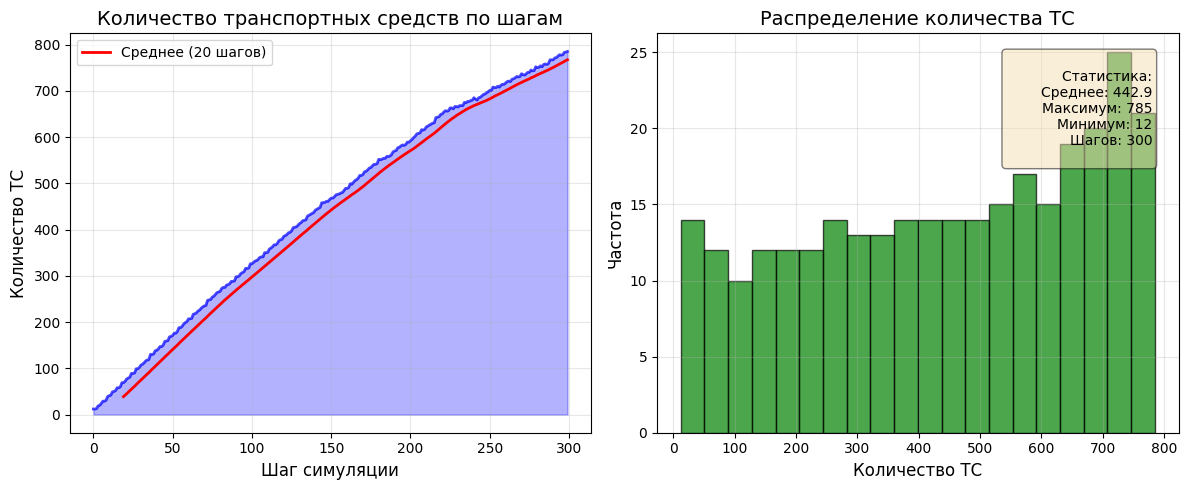


🎉 ПОЛНАЯ СИМУЛЯЦИЯ ЗАВЕРШЕНА!
   Окно SUMO-GUI закроется автоматически
   Все файлы сохранены в: C:\Users\ksuzh\my_project_v3\my_project\smart_city\result

СРАВНЕНИЕ СТРАТЕГИЙ УПРАВЛЕНИЯ

                 strategy  efficiency  avg_delay  total_vehicles  avg_speed
0  Циклическая (baseline)    0.974607  34.579096             188  48.769332
1  Q-learning (обученный)    0.974118  33.401649             194  48.744878


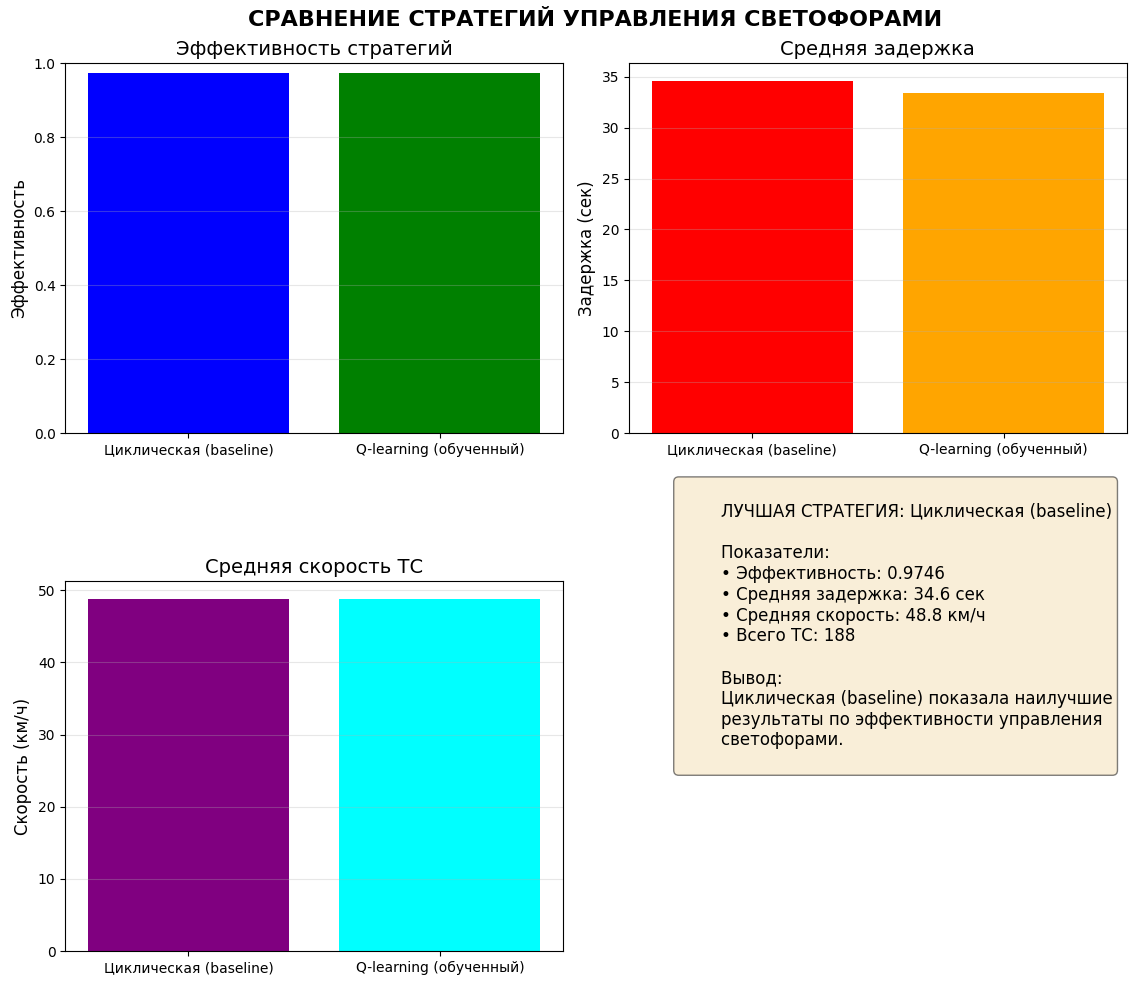


ВСЕ ЭТАПЫ ВЫПОЛНЕНЫ УСПЕШНО!


In [11]:
# ============================================
# ЯЧЕЙКА 9: ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ Q-LEARNING
# ============================================

print("="*70)
print("ЗАПУСК ОБУЧЕНИЯ Q-LEARNING КОНТРОЛЛЕРА")
print("="*70)

# Сначала обучим контроллер на нескольких эпизодах
print("\n🚀 ЭТАП 1: ОБУЧЕНИЕ")
print("   Запускаем 3 эпизода обучения...")

# Устанавливаем стратегию Q-learning
import os
os.environ['CONTROL_STRATEGY'] = 'qlearning'

# Запускаем обучение
learning_results = train_qlearning_controller(
    episodes=3,  # Можно увеличить для лучшего обучения
    steps_per_episode=300
)

print("\n✅ ОБУЧЕНИЕ ЗАВЕРШЕНО!")

# Теперь протестируем обученный контроллер
print("\n🚀 ЭТАП 2: ТЕСТИРОВАНИЕ ОБУЧЕННОГО КОНТРОЛЛЕРА")
print("   Запускаем тестовую симуляцию с GUI...")

# Запускаем симуляцию с визуализацией
run_full_simulation_with_gui(
    steps=500,
    gui_delay=100,
    use_controller=True
)

print("\n✅ ТЕСТИРОВАНИЕ ЗАВЕРШЕНО!")

# Сравниваем с другими стратегиями
print("\n🚀 ЭТАП 3: СРАВНЕНИЕ С ДРУГИМИ СТРАТЕГИЯМИ")

comparison_results = compare_strategies_with_visualization()

print("\n" + "="*70)
print("ВСЕ ЭТАПЫ ВЫПОЛНЕНЫ УСПЕШНО!")
print("="*70)

ПОЛНОЕ СРАВНЕНИЕ 5 СТРАТЕГИЙ УПРАВЛЕНИЯ СВЕТОФОРАМИ

📋 БУДУТ ПРОТЕСТИРОВАНЫ СЛЕДУЮЩИЕ СТРАТЕГИИ:

1. 🟢 Простая циклическая стратегия
   - Поочередная смена фаз (север-юг / восток-запад)
   - Фиксированные длительности фаз

2. 🔵 Улучшенная алгоритмическая стратегия
   - Адаптивные длительности фаз на основе загруженности
   - Учет очередей и времени ожидания

3. 🟡 Улучшенный Q-learning
   - Табличное обучение с подкреплением
   - Улучшенное представление состояния
   - Более сложная функция награды

4. 🟣 PPO (Proximal Policy Optimization)
   - Продвинутый алгоритм обучения с подкреплением
   - Нейросетевая аппроксимация политики
   - Устойчивость к переобучению

5. 🔴 Мультиагентная система
   - Координация между светофорами
   - Обмен информацией о загруженности
   - Согласованное управление сетью

🚀 НАЧИНАЕМ СРАВНЕНИЕ...

Запуск стратегии: Простая циклическая
✅ Простая циклическая стратегия инициализирована
   Управляем 8 светофорами
  Шаг  100/1000 | ТС: 325
  Шаг  200/1000 | ТС: 617


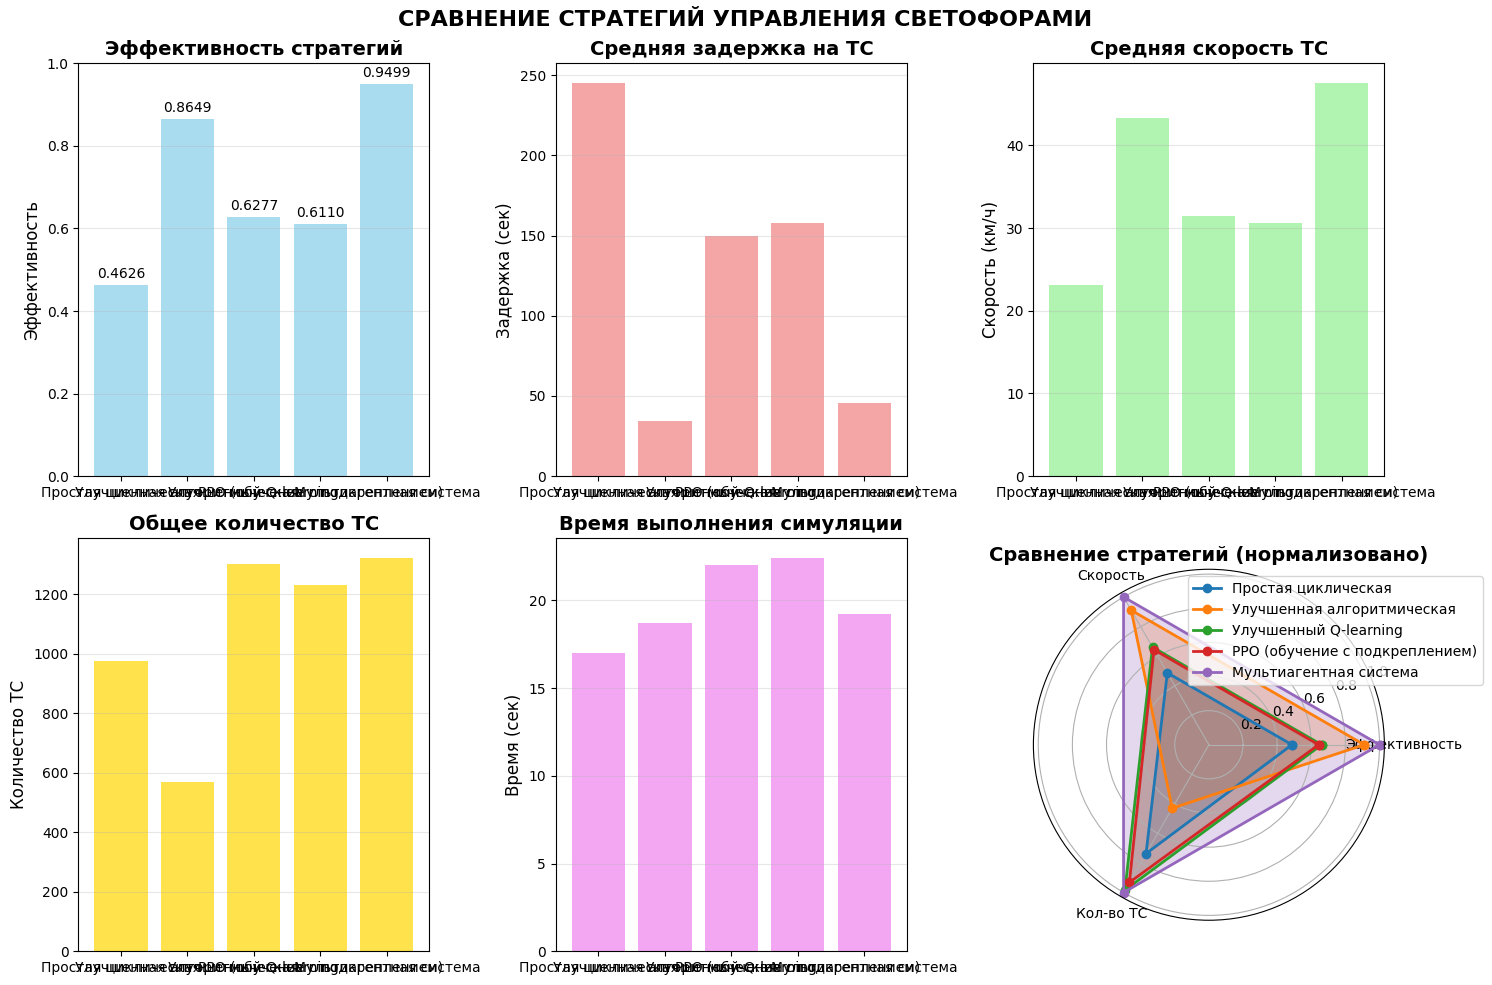


📈 Графики сравнения сохранены: C:\Users\ksuzh\my_project_v3\my_project_v3\my_project\smart_city\result\comparison\comparison_chart.png

ТАБЛИЦА СРАВНЕНИЯ СТРАТЕГИЙ
Стратегия                 Эффективность Ср.задержка  Ср.скорость  Всего ТС   Время (с) 
--------------------------------------------------------------------------------
Мультиагентная система    0.9499       45.73        47.5         1322       19.2      
Улучшенная алгоритмическая 0.8649       34.15        43.3         568        18.7      
Улучшенный Q-learning     0.6277       149.91       31.4         1301       22.0      
PPO (обучение с подкреплением) 0.6110       157.70       30.6         1232       22.4      
Простая циклическая       0.4626       245.07       23.2         974        17.0      

🏆 ЛУЧШАЯ СТРАТЕГИЯ: Мультиагентная система
   Эффективность: 0.9499
   Средняя задержка: 45.73 сек
   Средняя скорость: 47.5 км/ч

✅ СРАВНЕНИЕ ЗАВЕРШЕНО!

🏆 ИТОГИ СРАВНЕНИЯ:
1. Мультиагентная система    - Эффективность: 0.94

In [7]:
# ============================================
# ЯЧЕЙКА: ЗАПУСК ПОЛНОГО СРАВНЕНИЯ СТРАТЕГИЙ
# ============================================

print("="*70)
print("ПОЛНОЕ СРАВНЕНИЕ 5 СТРАТЕГИЙ УПРАВЛЕНИЯ СВЕТОФОРАМИ")
print("="*70)

def run_all_strategies_comparison():
    """Запускает сравнение всех 5 стратегий"""
    
    # Импортируем модуль сравнения
    import sys
    from pathlib import Path
    
    project_root = Path.cwd()
    smart_city_dir = project_root / "smart_city"
    src_dir = smart_city_dir / "src"
    
    # Добавляем путь
    sys.path.insert(0, str(src_dir))
    
    try:
        from comparison_runner import run_complete_comparison
        
        print("\n📋 БУДУТ ПРОТЕСТИРОВАНЫ СЛЕДУЮЩИЕ СТРАТЕГИИ:")
        print("\n1. 🟢 Простая циклическая стратегия")
        print("   - Поочередная смена фаз (север-юг / восток-запад)")
        print("   - Фиксированные длительности фаз")
        
        print("\n2. 🔵 Улучшенная алгоритмическая стратегия")
        print("   - Адаптивные длительности фаз на основе загруженности")
        print("   - Учет очередей и времени ожидания")
        
        print("\n3. 🟡 Улучшенный Q-learning")
        print("   - Табличное обучение с подкреплением")
        print("   - Улучшенное представление состояния")
        print("   - Более сложная функция награды")
        
        print("\n4. 🟣 PPO (Proximal Policy Optimization)")
        print("   - Продвинутый алгоритм обучения с подкреплением")
        print("   - Нейросетевая аппроксимация политики")
        print("   - Устойчивость к переобучению")
        
        print("\n5. 🔴 Мультиагентная система")
        print("   - Координация между светофорами")
        print("   - Обмен информацией о загруженности")
        print("   - Согласованное управление сетью")
        
        print("\n" + "="*70)
        print("🚀 НАЧИНАЕМ СРАВНЕНИЕ...")
        print("="*70)
        
        # Запускаем сравнение
        comparison = run_complete_comparison()
        
        print("\n✅ СРАВНЕНИЕ ЗАВЕРШЕНО!")
        
        # Показываем краткие итоги
        if hasattr(comparison, 'results') and comparison.results:
            print("\n🏆 ИТОГИ СРАВНЕНИЯ:")
            
            # Сортируем по эффективности
            sorted_results = sorted(
                comparison.results, 
                key=lambda x: x.metrics.get('efficiency', 0), 
                reverse=True
            )
            
            for i, result in enumerate(sorted_results, 1):
                print(f"{i}. {result.name:25} - "
                      f"Эффективность: {result.metrics.get('efficiency', 0):.4f}")
        
        return comparison
        
    except ImportError as e:
        print(f"\n❌ ОШИБКА ИМПОРТА: {e}")
        print("\nУбедитесь, что созданы файлы:")
        print("1. comparison_runner.py")
        print("2. strategy_controllers.py")
        print("3. controller.py (базовый)")
        return None
    except Exception as e:
        print(f"\n❌ ОШИБКА: {e}")
        import traceback
        traceback.print_exc()
        return None

# Запускаем сравнение
comparison_results = run_all_strategies_comparison()

print("\n" + "="*70)
print("Готово! Результаты сохранены в папке result/comparison/")
print("="*70)

In [ ]:
"""Настройка для визуального тестирования"""
import sys
from pathlib import Path

project_root = Path.cwd()
smart_city_dir = project_root / "smart_city"
src_dir = smart_city_dir / "src"

# Добавляем пути
sys.path.insert(0, str(src_dir))

# Импортируем модуль визуального тестирования
try:
    from visual_testing import (
        test_simple_cyclic,
        test_enhanced_algorithmic,
        test_qlearning,
        test_ppo,
        test_multiagent,
        test_all_strategies_quick,
        interactive_strategy_test,
        test_strategy_with_realtime_plots
    )
    
    print("✅ Модуль визуального тестирования загружен")
    return True
except ImportError as e:
    print(f"❌ Ошибка импорта: {e}")
    print("\nУбедитесь, что созданы файлы:")
    print("1. visual_testing.py")
    print("2. strategy_controllers.py")
    return False

In [10]:
test_simple_cyclic(steps=200, gui_delay=100)

NameError: name 'test_simple_cyclic' is not defined


📝 Чтобы запустить примеры, раскомментируйте строку:

🏃‍♂️ БЫСТРЫЕ ПРИМЕРЫ ТЕСТИРОВАНИЯ

1. 🧪 Тест простой циклической стратегии (быстро)
   Будет открыто окно SUMO-GUI на 200 шагов



Запустить тест? (y/n):  y



🧪 ТЕСТИРОВАНИЕ: ПРОСТАЯ ЦИКЛИЧЕСКАЯ СТРАТЕГИЯ

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Простая циклическая
   Шагов: 200
   Задержка GUI: 100 мс
   Файл результатов: tripinfo_Простая циклическая_1765726579.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Простая циклическая стратегия инициализирована
   Управляем 8 светофорами
   🎛️ Контроллер создан: SimpleCyclicController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  200/200 (100.0%) | Время:  200.0 с | ТС: 617 | Ожидание: 819841.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Простая циклическая':
   Время выполнения: 23.4 сек
   Максимум ТС за шаг: 618
   Смен фаз светофоров: 1368
   Общее время ожидания: 819841.0 сек

📈 МЕТРИКИ ЭФФЕКТИ

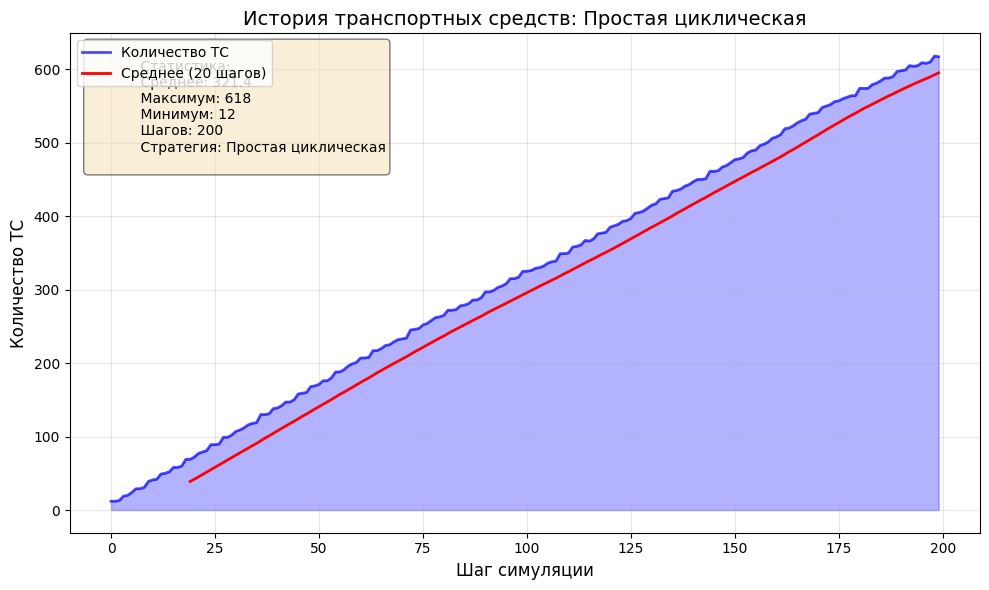


2. 🧪 Тест Q-learning стратегии (дольше, с обучением)
   Будет открыто окно SUMO-GUI на 300 шагов



Запустить тест? (y/n):  y



🧪 ТЕСТИРОВАНИЕ: Q-LEARNING СТРАТЕГИЯ

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Q-learning
   Шагов: 300
   Задержка GUI: 150 мс
   Файл результатов: tripinfo_Q-learning_1765726630.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Улучшенный Q-learning контроллер инициализирован
   ε (exploration): 0.300
   Размер Q-таблицы: 0 состояний
   🎛️ Контроллер создан: ImprovedQLearningController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  300/300 (100.0%) | Время:  300.0 с | ТС: 782 | Ожидание: 169615.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Q-learning':
   Время выполнения: 49.4 сек
   Максимум ТС за шаг: 782
   Смен фаз светофоров: 2400
   Общее время ожидания: 169615.0 сек

📈 МЕТРИКИ ЭФФЕ

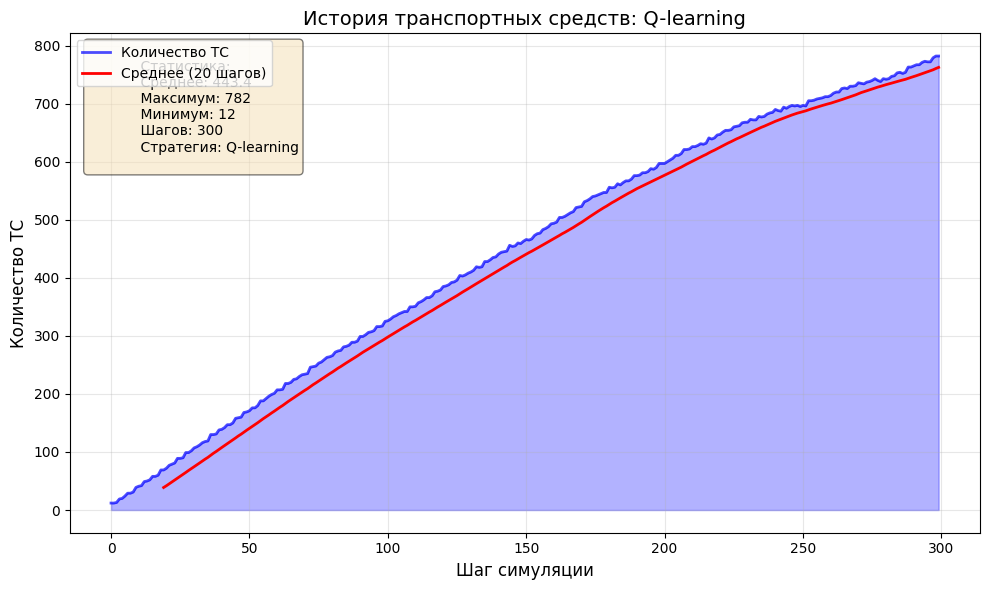


3. 🧪 Быстрый обзор всех стратегий
   Каждая стратегия по 100 шагов



Запустить тест? (y/n):  y



🚀 БЫСТРОЕ ТЕСТИРОВАНИЕ ВСЕХ СТРАТЕГИЙ

▶️ Запускаем: Простая циклическая

🧪 ТЕСТИРОВАНИЕ: ПРОСТАЯ ЦИКЛИЧЕСКАЯ СТРАТЕГИЯ

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Простая циклическая
   Шагов: 100
   Задержка GUI: 30 мс
   Файл результатов: tripinfo_Простая циклическая_1765726705.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Простая циклическая стратегия инициализирована
   Управляем 8 светофорами
   🎛️ Контроллер создан: SimpleCyclicController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  100/100 (100.0%) | Время:  100.0 с | ТС: 325 | Ожидание: 20004.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Простая циклическая':
   Время выполнения: 4.5 сек
   Максимум ТС за шаг: 325
   Смен фаз св

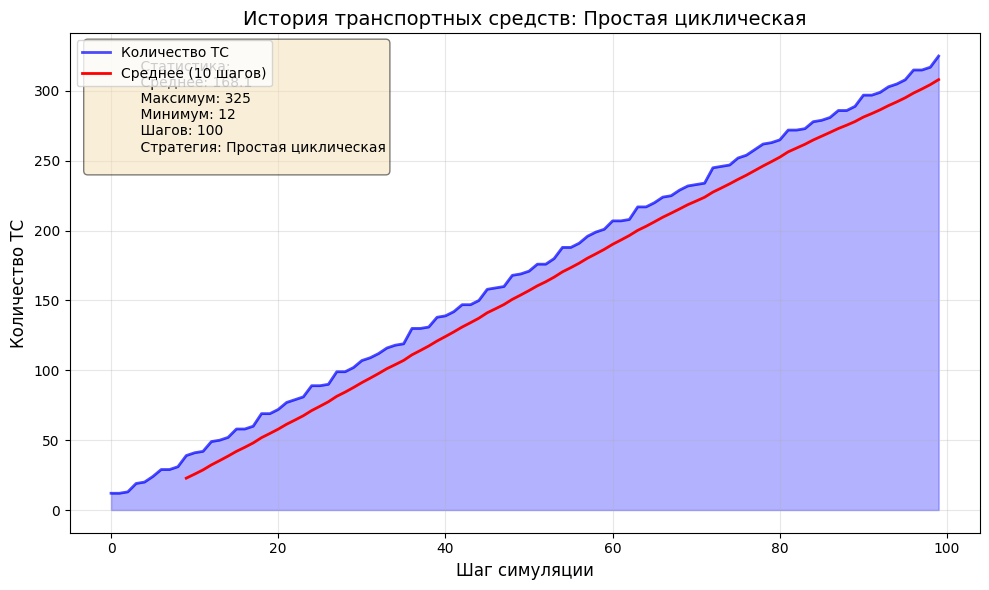


▶️ Запускаем: Улучшенная алгоритмическая

🧪 ТЕСТИРОВАНИЕ: УЛУЧШЕННАЯ АЛГОРИТМИЧЕСКАЯ СТРАТЕГИЯ

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Улучшенная алгоритмическая
   Шагов: 100
   Задержка GUI: 30 мс
   Файл результатов: tripinfo_Улучшенная алгоритмическая_1765726713.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Улучшенная алгоритмическая стратегия инициализирована
   🎛️ Контроллер создан: EnhancedAlgorithmicController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  100/100 (100.0%) | Время:  100.0 с | ТС: 324 | Ожидание: 10498.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Улучшенная алгоритмическая':
   Время выполнения: 4.4 сек
   Максимум ТС за шаг: 324
   Смен фаз светофоров: 728
   

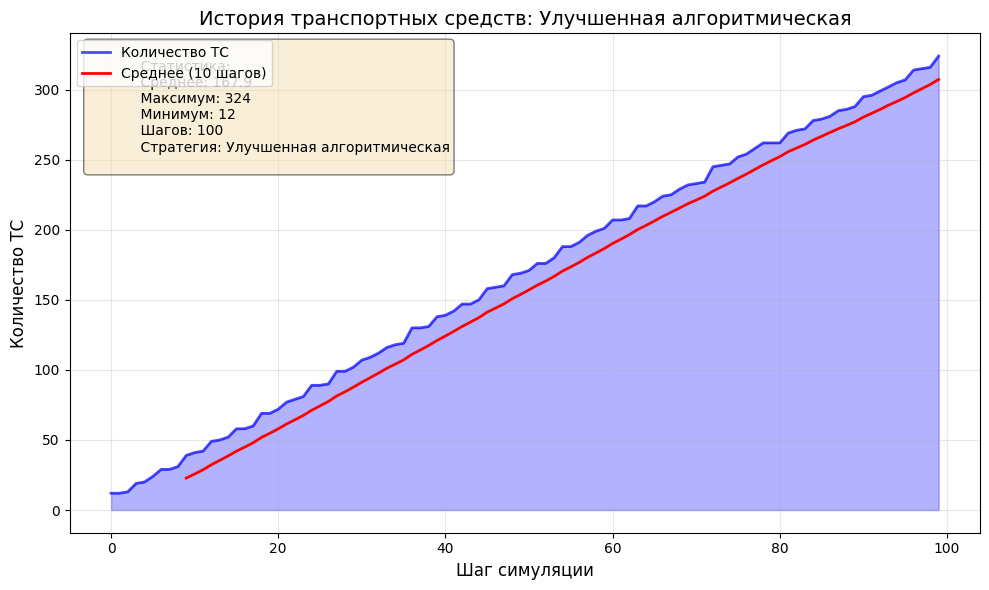


▶️ Запускаем: Q-learning

🧪 ТЕСТИРОВАНИЕ: Q-LEARNING СТРАТЕГИЯ

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Q-learning
   Шагов: 100
   Задержка GUI: 30 мс
   Файл результатов: tripinfo_Q-learning_1765726723.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Улучшенный Q-learning контроллер инициализирован
   ε (exploration): 0.300
   Размер Q-таблицы: 0 состояний
   🎛️ Контроллер создан: ImprovedQLearningController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  100/100 (100.0%) | Время:  100.0 с | ТС: 325 | Ожидание: 2749.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Q-learning':
   Время выполнения: 4.8 сек
   Максимум ТС за шаг: 325
   Смен фаз светофоров: 800
   Общее время ожидания: 2749.0 

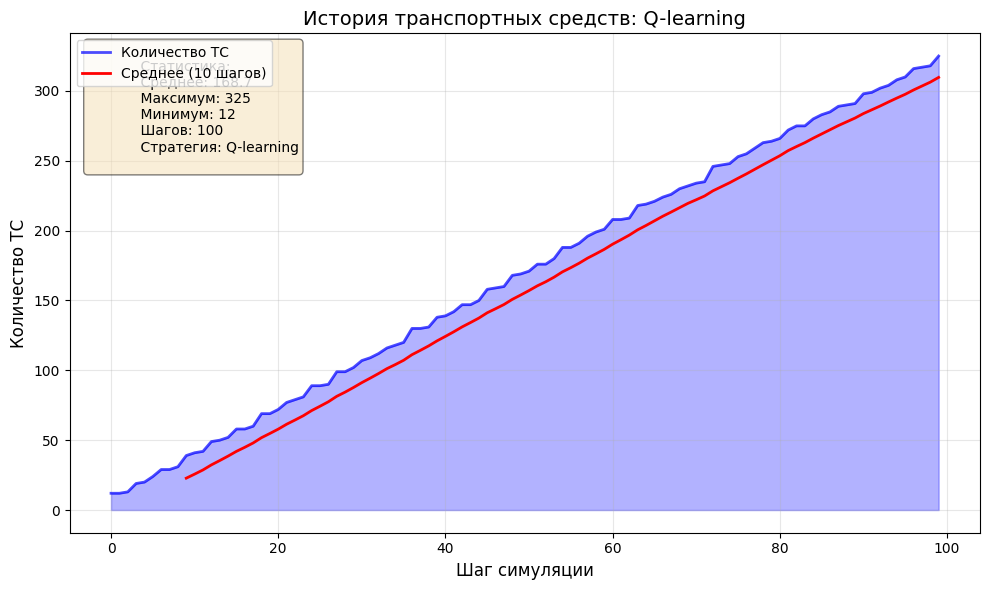


▶️ Запускаем: PPO

🧪 ТЕСТИРОВАНИЕ: PPO СТРАТЕГИЯ

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: PPO
   Шагов: 100
   Задержка GUI: 30 мс
   Файл результатов: tripinfo_PPO_1765726732.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ PPO контроллер инициализирован (упрощенная версия)
   Для полноценного PPO используйте stable-baselines3
   🎛️ Контроллер создан: PPOTrafficController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  100/100 (100.0%) | Время:  100.0 с | ТС: 326 | Ожидание: 1616.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'PPO':
   Время выполнения: 5.4 сек
   Максимум ТС за шаг: 326
   Смен фаз светофоров: 800
   Общее время ожидания: 1616.0 сек

📈 МЕТРИКИ ЭФФЕКТИВНОСТИ:
   Эффективност

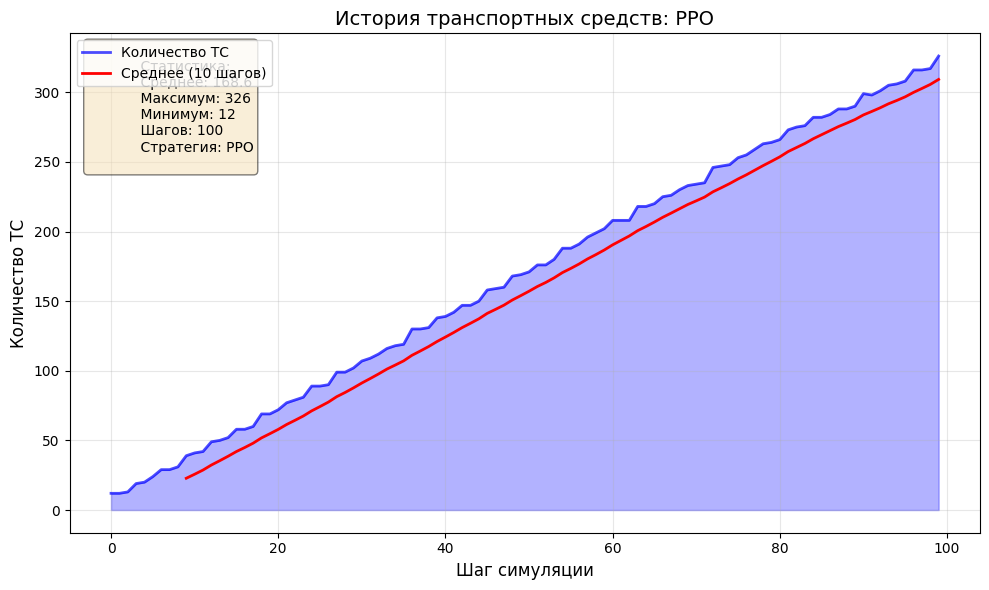


▶️ Запускаем: Мультиагентная

🧪 ТЕСТИРОВАНИЕ: МУЛЬТИАГЕНТНАЯ СИСТЕМА

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Мультиагентная
   Шагов: 100
   Задержка GUI: 30 мс
   Файл результатов: tripinfo_Мультиагентная_1765726742.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Мультиагентная система инициализирована
   Количество агентов: 8
   Среднее количество соседей: 1.0
   🎛️ Контроллер создан: MultiAgentTrafficController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  100/100 (100.0%) | Время:  100.0 с | ТС: 324 | Ожидание: 34942.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Мультиагентная':
   Время выполнения: 4.8 сек
   Максимум ТС за шаг: 324
   Смен фаз светофоров: 800
   Общее время ожидан

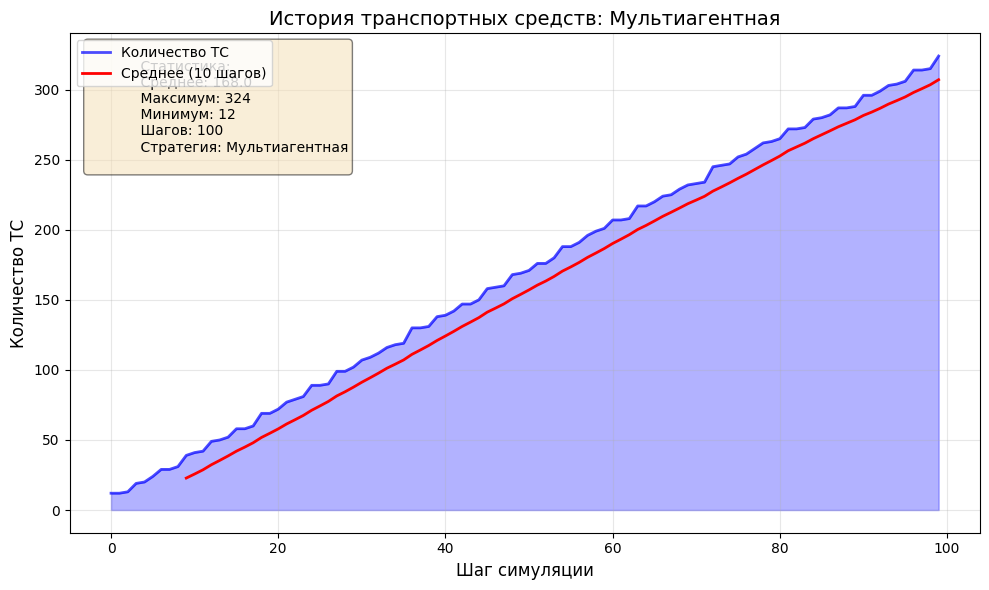


📋 ИТОГИ ТЕСТИРОВАНИЯ:
  Простая циклическая            - ✅ УСПЕШНО
  Улучшенная алгоритмическая     - ✅ УСПЕШНО
  Q-learning                     - ✅ УСПЕШНО
  PPO                            - ✅ УСПЕШНО
  Мультиагентная                 - ✅ УСПЕШНО

4. 🎮 Интерактивное меню тестирования



Открыть интерактивное меню? (y/n):  y



🎮 ИНТЕРАКТИВНОЕ ТЕСТИРОВАНИЕ СТРАТЕГИЙ

Выберите стратегию для тестирования:
1. Простая циклическая
2. Улучшенная алгоритмическая
3. Q-learning
4. PPO
5. Мультиагентная система
6. Быстро протестировать все стратегии
7. Выход



Ваш выбор (1-7):  5
Количество шагов [300]:  500
Задержка GUI (мс) [100]:  100



🧪 ТЕСТИРОВАНИЕ: МУЛЬТИАГЕНТНАЯ СИСТЕМА

🎮 ВИЗУАЛЬНОЕ ТЕСТИРОВАНИЕ: Мультиагентная
   Шагов: 500
   Задержка GUI: 100 мс
   Файл результатов: tripinfo_Мультиагентная_1765726768.xml

🚀 ЗАПУСК SUMO-GUI...
   Откроется окно с визуализацией дорог и светофоров
   Для управления используйте:
   • Пауза: Ctrl+P или кнопка ▶️/⏸️
   • Ускорение: клавиша + или кнопка >>
   • Замедление: клавиша - или кнопка <<
   • Скриншот: Ctrl+S или кнопка 📷
   • Закрыть: Alt+F4 или кнопка ✕
✅ Мультиагентная система инициализирована
   Количество агентов: 8
   Среднее количество соседей: 1.0
   🎛️ Контроллер создан: MultiAgentTrafficController
   🔦 Управляем светофорами: 8 шт

🔄 ВЫПОЛНЕНИЕ СИМУЛЯЦИИ...
   Смотрите движение в окне SUMO-GUI!
  Шаг  500/500 (100.0%) | Время:  500.0 с | ТС: 1034 | Ожидание: 12255512.0 с

✅ СИМУЛЯЦИЯ ЗАВЕРШЕНА!

📊 РЕЗУЛЬТАТЫ СТРАТЕГИИ 'Мультиагентная':
   Время выполнения: 485.0 сек
   Максимум ТС за шаг: 1034
   Смен фаз светофоров: 4000
   Общее время ожидания: 12255512.0 сек

📈

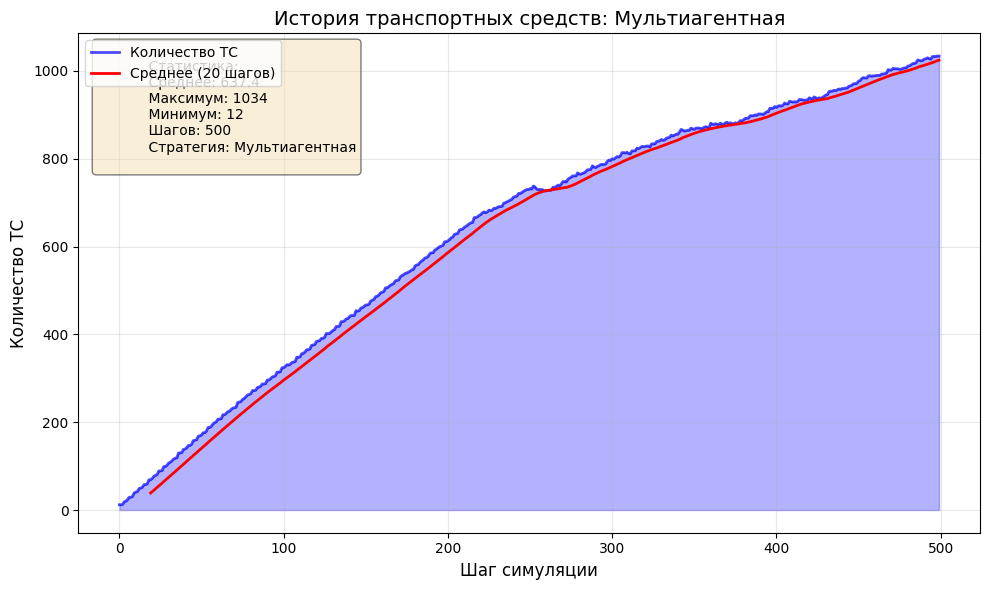


Выберите стратегию для тестирования:
1. Простая циклическая
2. Улучшенная алгоритмическая
3. Q-learning
4. PPO
5. Мультиагентная система
6. Быстро протестировать все стратегии
7. Выход


In [ ]:
# ============================================
# ЯЧЕЙКА: ПРИМЕРЫ БЫСТРОГО ТЕСТИРОВАНИЯ
# ============================================

def run_visual_examples():
    """Запускает примеры визуального тестирования"""
    
    print("\n" + "="*70)
    print("🏃‍♂️ БЫСТРЫЕ ПРИМЕРЫ ТЕСТИРОВАНИЯ")
    print("="*70)
    
    print("\n1. 🧪 Тест простой циклической стратегии (быстро)")
    print("   Будет открыто окно SUMO-GUI на 200 шагов")
    
    choice = input("\nЗапустить тест? (y/n): ").strip().lower()
    
    if choice == 'y':
        try:
            from visual_testing import test_simple_cyclic
            test_simple_cyclic(steps=200, gui_delay=100)
        except Exception as e:
            print(f"❌ Ошибка: {e}")
    
    print("\n2. 🧪 Тест Q-learning стратегии (дольше, с обучением)")
    print("   Будет открыто окно SUMO-GUI на 300 шагов")
    
    choice = input("\nЗапустить тест? (y/n): ").strip().lower()
    
    if choice == 'y':
        try:
            from visual_testing import test_qlearning
            test_qlearning(steps=300, gui_delay=150)
        except Exception as e:
            print(f"❌ Ошибка: {e}")
    
    print("\n3. 🧪 Быстрый обзор всех стратегий")
    print("   Каждая стратегия по 100 шагов")
    
    choice = input("\nЗапустить тест? (y/n): ").strip().lower()
    
    if choice == 'y':
        try:
            from visual_testing import test_all_strategies_quick
            test_all_strategies_quick(steps=100, gui_delay=30)
        except Exception as e:
            print(f"❌ Ошибка: {e}")
    
    print("\n4. 🎮 Интерактивное меню тестирования")
    
    choice = input("\nОткрыть интерактивное меню? (y/n): ").strip().lower()
    
    if choice == 'y':
        try:
            from visual_testing import interactive_strategy_test
            interactive_strategy_test()
        except Exception as e:
            print(f"❌ Ошибка: {e}")
    
    print("\n✅ Примеры тестирования завершены!")

# Запустить примеры (можно раскомментировать)
# run_visual_examples()

print("\n📝 Чтобы запустить примеры, раскомментируйте строку:")
run_visual_examples()

In [ ]:
📈 МЕТРИКИ ЭФФЕКТИВНОСТИ:
   Эффективность: 0.9586
   Средняя задержка: 21.93 сек
   Средняя скорость: 48.0 км/ч

📈 МЕТРИКИ ЭФФЕКТИВНОСТИ:
   Эффективность: 0.9760
   Средняя задержка: 33.52 сек
   Средняя скорость: 48.8 км/ч
   Всего ТС: 186
   📊 График сохранен: vehicle_chart_Q-learning_1765726681.png